___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://machinelearningmastery.com/wp-content/uploads/2016/03/Compare-Machine-Learning-Algorithms.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Comparación de modelos de regresión</font>

Una vez que aprendimos a crear los modelos de machine learning ¿qué hacemos con ellos?

Comparar varios modelos de machine learning para problemas de regresión es necesario para poder encontrar cuál de todos los modelos es el más eficiente y tiene los resultados más precisos. 

Hay muchos criterios para comparar los modelos. 

Recordando que si la **variable de respuesta es continua** entonces, este es un problema de **regresión** y tenemos que usar modelos de regresión para estimar los valores predichos. 

Como vimos, hay muchos modelos de regresión candidatos. Nuestra tarea es encontrar el que sirva a nuestro propósito.

Vamos a comparar los siguientes modelos:
- Regresión lineal múltiple
- Regresión LASSO
- Regresión Ridge
- Árbol de decisión
- Bosques Aleatorios
- SVR
- Redes Neuronales

Vamos a utilizar varias métricas para comparar los modelos.

### Métricas de Performance (Regresión)

**Error Absoluto Medio (Mean Absolute Error - MAE)**

Si $y$ es la variable de respuesta y $\hat{y}$ es la predicción, entonces el MAE es el error entre estos pares ($y$,$\hat{y}$) de variables y se calcula de la forma:

$$MAE = \frac{\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|}{n}$$

*¿Qué hace?*
- Mide el promedio del error absoluto entre los valores reales y las predicciones

*Ventajas*
- Es una métrica independiente de la escala, lo que significa que está en las mismas unidades de las variables originales. 
- Fácil de interpretar
- Es buena opción si no nos importan los valores atípicos

*Desventajas*
- Se les da la misma importancia (peso) a todos los errores
- Es insensible a valores atípicos



**Error Cuadrático Medio (Mean Square Error - MSE)**


$$MSE = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{n}$$

*¿Qué hace?*
El MSE calcula el promedio de los cuadrados del error entre los valores verdaderos y los valores estimados

*Ventajas*
- Función diferenciable
- El efecto de errores más grandes se vuelve más pronunciado que los errores más pequeños

*Desventajas*
- Tiene diferentes unidades que los valores reales


**Diferencia entre el MAE y el MSE**

La gran diferencia es cómo responden a errores más grandes. 

Depende mucho de la decisión del negocio y el costo asociado a los errores. 
     
 **R^2**
 
 $$R^{2}=1-\frac{SS_{res}}{SS_{Tot}}= \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$
 
 *¿Qué hace?*
- Explica la proporción de la varianza de la salida ("Y") que puede ser explicada por los predictores ("X")

*Desventajas*
- Siempre incrementa añadiendo más variables independientes (X), lo cual es una desventaja porque esas variables pueden no ser importantes para el modelo

*Ventajas*
- Es una métrica relativa que se usa para comparar varios modelos que fueron entrenados con los mismos datos

     
     
 

### Los Datos

Tenemos un dataset de personas que tienen un carro y lo quieren vender. Se tienen las siguientes variables:

- Age 
- Gender
- Miles: promedio de millas manejadas por día
- Debt
- Income
- Sales

Basados en esas variables, queremos predecir el valor potencial de venta de un carro, por lo que variable a predecir es "Sales". 

In [3]:
#Librerías

import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD, Adam


In [4]:
#cargar datos
datos = pd.read_csv('carros.csv')
datos.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [5]:
#Revisamos si hay datos nulos
missing = pd.DataFrame(datos.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
age,0
gender,0
miles,0
debt,0
income,0
sales,0


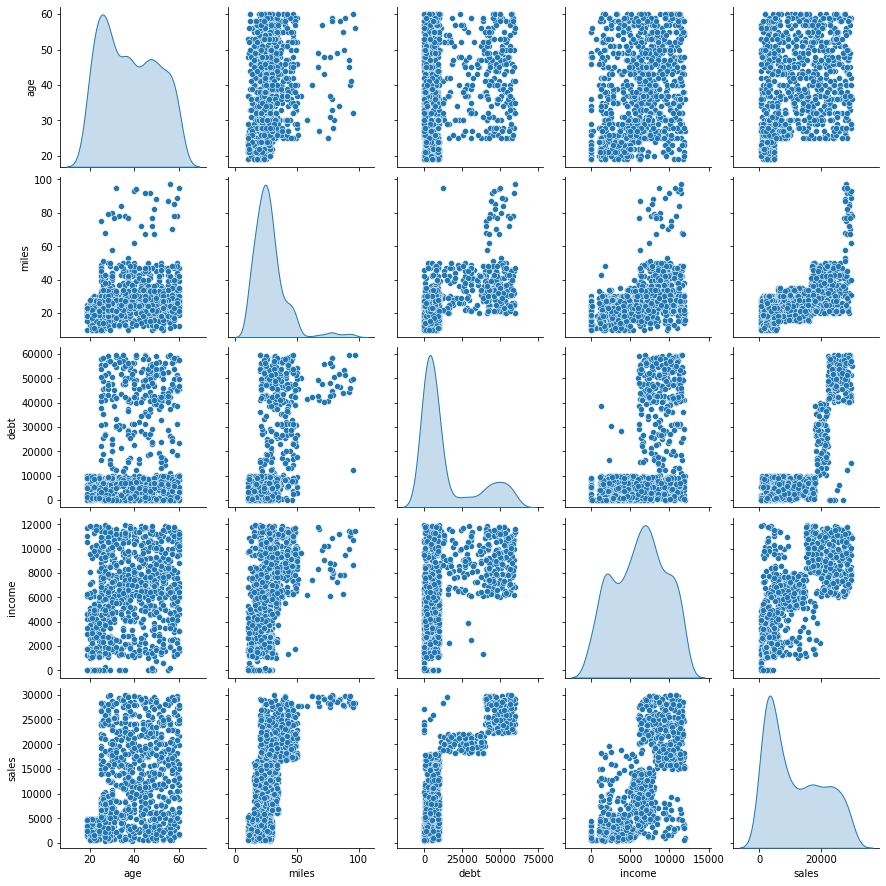

In [6]:
#Creamos gráficos básicos de los datos
sns.pairplot(datos[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [7]:
#Calculando estadísticas básicas con los datos
datos_stats = datos.describe()
datos_stats = datos_stats.transpose()
datos_stats

,count,mean,std,min,25%,50%,75%,max
age,963.0,37.971963,12.290838,19.0,27.0,37.0,49.0,60.0
gender,963.0,0.512980,0.500091,0.0,0.0,1.0,1.0,1.0
miles,963.0,27.704050,13.378181,10.0,20.0,25.0,32.0,97.0
debt,963.0,14109.004154,18273.702481,0.0,1475.0,6236.0,16686.0,59770.0
income,963.0,6176.047767,3260.670142,0.0,3506.5,6360.0,8649.5,11970.0
sales,963.0,11689.860852,8986.896921,500.0,3554.0,9130.0,19245.0,29926.0


De las estadísticas anteriores podemos observar que algunas variables tienen grandes rangos y desviaciones, lo cual puede crear problemas durante el ajuste del modelo. Por lo tanto sería buena idea escalar los datos. 

### Train Test split

In [8]:
#separar la X y Y
X=datos.iloc[:,0:5]
y=datos.iloc[:,5]

#Dividimos los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
#Estandarizar datos
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

**¿Porqué estandarizar los datos después del train test split?**

El escalamiento debe realizarse después de dividir los datos en entrenamiento y prueba, y se debe hacer sólo usando los datos de entrenamiento. 

Esto se debe a que los datos de prueba (test) tienen el papel de datos no vistos por el modelo, por lo que se supone que estos datos no están accesibles en la estapa del entrenamiento. 

Usar cualquier información proveniente de los datos de prueba antes o durante el entranamiento puede afectar al desempeño del modelo

#### Regresión Lineal 


In [14]:
#Inicializo objeto de regresión lineal
lin_reg = LinearRegression()
#Entrenar modelo
lin_reg.fit(X_train, y_train)
#Predecimos con datos de prueba
y_pred = lin_reg.predict(X_test)
#Métricas de performance
mae_lr = metrics.mean_absolute_error(y_test, y_pred)
mse_lr = metrics.mean_squared_error(y_test, y_pred)
r2_lr = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('r2: ', r2_lr)
print('MAE: ', mae_lr)
print('MSE: ', mse_lr)
print('RMSE: ', np.sqrt(mae_lr))

r2:  0.8364108886819762
MAE:  0.3119007815345352
MSE:  0.1635891113180238
RMSE:  0.5584807799150614


#### Regresión Lineal con selección de variables

In [19]:
#Entrenar modelo
rfe = RFE(lin_reg, n_features_to_select = 4)
rfe = rfe.fit(X_train, y_train)

#Predecimos con datos de prueba
y_pred = rfe.predict(X_test)

#Métricas de performance
mae_rfe = metrics.mean_absolute_error(y_test, y_pred)
mse_rfe = metrics.mean_squared_error(y_test, y_pred)
r2_rfe = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('r2: ', r2_rfe)
print('MAE: ', mae_rfe)
print('MSE: ', mse_rfe)
print('RMSE: ', np.sqrt(mae_rfe))

r2:  0.8367174006172184
MAE:  0.31150993315869785
MSE:  0.16328259938278153
RMSE:  0.5581307491607123


#### Regresión Lineal con regularización Ridge


In [20]:
#Inicializo modelo de ridge con alpha = 1
ridge = Ridge(alpha=1)
#Entrenar modelo
ridge.fit(X_train,y_train)
#Predecir con datos de prueba
ridge_pred = ridge.predict(X_test)

#Métricas de performance
mae_ridge = metrics.mean_absolute_error(y_test, ridge_pred)
mse_ridge=metrics.mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

# Imprimir resultados
print('R2:  ',r2_ridge)
print('MAE: ', mae_ridge)
print('MSE: ', mse_ridge)
print('RMSE:', np.sqrt(mse_ridge))

R2:   0.8364172531254731
MAE:  0.3119341315613786
MSE:  0.16358274687452687
RMSE: 0.4044536399570745


#### Bosques Aleatorios

In [21]:
#Inicializamos el bosque con 300 árboles
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predecir el precio de venta  
y_pred = rf_regressor.predict(X_test)

#Calcular métricas
mae_rf=metrics.mean_absolute_error(y_test, y_pred)
mse_rf=metrics.mean_squared_error(y_test, y_pred)
r2_rf=metrics.r2_score(y_test, y_pred)

#Imprimir métricas
print('R2 square:',r2_rf)
print('MAE: ', mae_rf)
print('MSE: ', mse_rf)

R2 square: 0.9084801915888976
MAE:  0.21443632769010845
MSE:  0.09151980841110245


#### Máquina de Soporte Vectorial para Regresión (SVR)

In [22]:
#Inicializar objeto
regressor= SVR(kernel='rbf')
#Entrenar modelo
regressor.fit(X_train,y_train)
#Predecir
y_pred_svm=regressor.predict(X_test)

#Calcular métricas
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svr=metrics.mean_squared_error(y_test, y_pred_svm)
r2_svr=metrics.r2_score(y_test, y_pred_svm)

# Imprimir Métricas
print('R2 square:',r2_svr)
print('MAE: ', mae_svr)
print('MSE: ', mse_svr)

R2 square: 0.8939968531978245
MAE:  0.2368613686845287
MSE:  0.10600314680217547


#### Red Neuronal

In [25]:
import tensorflow

In [26]:
#Hiperparámetros iniciales
epochs = 1000
learning_rate = 0.1
decay_rate = learning_rate/epochs
momentum = 0.8

# Crear arquitectura de la red neuronal
model = Sequential()
#5 variables de entrada, por lo tanto input_dim=5
model.add(Dense(12,activation='relu',input_dim=5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

# Configuración del optimizador
#gradiente descendente
opt = tensorflow.keras.optimizers.SGD(lr=learning_rate,momentum=momentum,
                           decay=decay_rate,nesterov=True)
#opt = keras.optimizers.Adam(lr=0.09)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mae','mse'])

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [27]:
#Ajustar modelo
history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

Epoch 1/1000
4/4 [==============================] - 1s 71ms/step - loss: 0.7552 - mae: 0.7608 - mse: 0.7552 - val_loss: 0.2407 - val_mae: 0.3902 - val_mse: 0.2407
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2497 - mae: 0.3813 - mse: 0.2497 - val_loss: 0.1978 - val_mae: 0.3354 - val_mse: 0.1978
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.2038 - mae: 0.3428 - mse: 0.2038 - val_loss: 0.1522 - val_mae: 0.2978 - val_mse: 0.1522
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1786 - mae: 0.3191 - mse: 0.1786 - val_loss: 0.1606 - val_mae: 0.2938 - val_mse: 0.1606
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1811 - mae: 0.3184 - mse: 0.1811 - val_loss: 0.1346 - val_mae: 0.2816 - val_mse: 0.1346
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1667 - mae: 0.3081 - mse: 0.1667 - val_loss: 0.1315 - val_mae: 0.2621 - val_mse: 0.1315
Epoch 7/1000
4/4 [=====

4/4 [==============================] - 0s 11ms/step - loss: 0.1226 - mae: 0.2520 - mse: 0.1226 - val_loss: 0.1068 - val_mae: 0.2419 - val_mse: 0.1068
Epoch 52/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1219 - mae: 0.2501 - mse: 0.1219 - val_loss: 0.1276 - val_mae: 0.2586 - val_mse: 0.1276
Epoch 53/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1257 - mae: 0.2537 - mse: 0.1257 - val_loss: 0.1119 - val_mae: 0.2415 - val_mse: 0.1119
Epoch 54/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1219 - mae: 0.2490 - mse: 0.1219 - val_loss: 0.1132 - val_mae: 0.2482 - val_mse: 0.1132
Epoch 55/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1243 - mae: 0.2547 - mse: 0.1243 - val_loss: 0.1120 - val_mae: 0.2601 - val_mse: 0.1120
Epoch 56/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1246 - mae: 0.2552 - mse: 0.1246 - val_loss: 0.1096 - val_mae: 0.2388 - val_mse: 0.1096
Epoch 57/1000
4/4 [=============

4/4 [==============================] - 0s 9ms/step - loss: 0.1187 - mae: 0.2450 - mse: 0.1187 - val_loss: 0.1106 - val_mae: 0.2401 - val_mse: 0.1106
Epoch 102/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1190 - mae: 0.2482 - mse: 0.1190 - val_loss: 0.1034 - val_mae: 0.2343 - val_mse: 0.1034
Epoch 103/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1144 - mae: 0.2412 - mse: 0.1144 - val_loss: 0.1033 - val_mae: 0.2345 - val_mse: 0.1033
Epoch 104/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1213 - mae: 0.2526 - mse: 0.1213 - val_loss: 0.1124 - val_mae: 0.2610 - val_mse: 0.1124
Epoch 105/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1194 - mae: 0.2536 - mse: 0.1194 - val_loss: 0.1361 - val_mae: 0.2730 - val_mse: 0.1361
Epoch 106/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1200 - mae: 0.2511 - mse: 0.1200 - val_loss: 0.1098 - val_mae: 0.2395 - val_mse: 0.1098
Epoch 107/1000
4/4 [========

Epoch 151/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1137 - mae: 0.2413 - mse: 0.1137 - val_loss: 0.1163 - val_mae: 0.2652 - val_mse: 0.1163
Epoch 152/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1173 - mae: 0.2524 - mse: 0.1173 - val_loss: 0.1119 - val_mae: 0.2410 - val_mse: 0.1119
Epoch 153/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1161 - mae: 0.2439 - mse: 0.1161 - val_loss: 0.1115 - val_mae: 0.2401 - val_mse: 0.1115
Epoch 154/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1110 - mae: 0.2368 - mse: 0.1110 - val_loss: 0.1096 - val_mae: 0.2404 - val_mse: 0.1096
Epoch 155/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1115 - mae: 0.2384 - mse: 0.1115 - val_loss: 0.1087 - val_mae: 0.2399 - val_mse: 0.1087
Epoch 156/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1100 - mae: 0.2369 - mse: 0.1100 - val_loss: 0.1176 - val_mae: 0.2488 - val_mse: 0.1176
Epoch 157/1000

Epoch 201/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1156 - mae: 0.2458 - mse: 0.1156 - val_loss: 0.1117 - val_mae: 0.2505 - val_mse: 0.1117
Epoch 202/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1106 - mae: 0.2404 - mse: 0.1106 - val_loss: 0.1158 - val_mae: 0.2438 - val_mse: 0.1158
Epoch 203/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1084 - mae: 0.2352 - mse: 0.1084 - val_loss: 0.1162 - val_mae: 0.2462 - val_mse: 0.1162
Epoch 204/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1085 - mae: 0.2357 - mse: 0.1085 - val_loss: 0.1263 - val_mae: 0.2568 - val_mse: 0.1263
Epoch 205/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1137 - mae: 0.2465 - mse: 0.1137 - val_loss: 0.1106 - val_mae: 0.2420 - val_mse: 0.1106
Epoch 206/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1080 - mae: 0.2340 - mse: 0.1080 - val_loss: 0.1151 - val_mae: 0.2488 - val_mse: 0.1151
Epoch 207/100

Epoch 251/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1115 - mae: 0.2359 - mse: 0.1115 - val_loss: 0.1097 - val_mae: 0.2509 - val_mse: 0.1097
Epoch 252/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1054 - mae: 0.2344 - mse: 0.1054 - val_loss: 0.1175 - val_mae: 0.2464 - val_mse: 0.1175
Epoch 253/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1047 - mae: 0.2300 - mse: 0.1047 - val_loss: 0.1123 - val_mae: 0.2458 - val_mse: 0.1123
Epoch 254/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.1055 - mae: 0.2325 - mse: 0.1055 - val_loss: 0.1147 - val_mae: 0.2455 - val_mse: 0.1147
Epoch 255/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1088 - mae: 0.2340 - mse: 0.1088 - val_loss: 0.1152 - val_mae: 0.2490 - val_mse: 0.1152
Epoch 256/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1045 - mae: 0.2312 - mse: 0.1045 - val_loss: 0.1435 - val_mae: 0.2814 - val_mse: 0.1435
Epoch 257/100

Epoch 301/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1143 - mae: 0.2460 - mse: 0.1143 - val_loss: 0.1329 - val_mae: 0.2689 - val_mse: 0.1329
Epoch 302/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1080 - mae: 0.2382 - mse: 0.1080 - val_loss: 0.1173 - val_mae: 0.2594 - val_mse: 0.1173
Epoch 303/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1063 - mae: 0.2340 - mse: 0.1063 - val_loss: 0.1097 - val_mae: 0.2462 - val_mse: 0.1097
Epoch 304/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1033 - mae: 0.2291 - mse: 0.1033 - val_loss: 0.1203 - val_mae: 0.2543 - val_mse: 0.1203
Epoch 305/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1056 - mae: 0.2326 - mse: 0.1056 - val_loss: 0.1185 - val_mae: 0.2532 - val_mse: 0.1185
Epoch 306/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1041 - mae: 0.2315 - mse: 0.1041 - val_loss: 0.1131 - val_mae: 0.2536 - val_mse: 0.1131
Epoch 307/100

Epoch 351/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1092 - mae: 0.2404 - mse: 0.1092 - val_loss: 0.1103 - val_mae: 0.2479 - val_mse: 0.1103
Epoch 352/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1057 - mae: 0.2327 - mse: 0.1057 - val_loss: 0.1196 - val_mae: 0.2631 - val_mse: 0.1196
Epoch 353/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1026 - mae: 0.2324 - mse: 0.1026 - val_loss: 0.1155 - val_mae: 0.2550 - val_mse: 0.1155
Epoch 354/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1022 - mae: 0.2271 - mse: 0.1022 - val_loss: 0.1125 - val_mae: 0.2491 - val_mse: 0.1125
Epoch 355/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0993 - mae: 0.2254 - mse: 0.0993 - val_loss: 0.1107 - val_mae: 0.2485 - val_mse: 0.1107
Epoch 356/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1008 - mae: 0.2260 - mse: 0.1008 - val_loss: 0.1135 - val_mae: 0.2491 - val_mse: 0.1135
Epoch 357/1000

Epoch 401/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0974 - mae: 0.2225 - mse: 0.0974 - val_loss: 0.1127 - val_mae: 0.2497 - val_mse: 0.1127
Epoch 402/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0990 - mae: 0.2266 - mse: 0.0990 - val_loss: 0.1161 - val_mae: 0.2490 - val_mse: 0.1161
Epoch 403/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0986 - mae: 0.2227 - mse: 0.0986 - val_loss: 0.1319 - val_mae: 0.2847 - val_mse: 0.1319
Epoch 404/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1112 - mae: 0.2490 - mse: 0.1112 - val_loss: 0.1145 - val_mae: 0.2551 - val_mse: 0.1145
Epoch 405/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0990 - mae: 0.2279 - mse: 0.0990 - val_loss: 0.1127 - val_mae: 0.2484 - val_mse: 0.1127
Epoch 406/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0986 - mae: 0.2263 - mse: 0.0986 - val_loss: 0.1335 - val_mae: 0.2708 - val_mse: 0.1335
Epoch 407/100

Epoch 451/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1002 - mae: 0.2288 - mse: 0.1002 - val_loss: 0.1220 - val_mae: 0.2618 - val_mse: 0.1220
Epoch 452/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1028 - mae: 0.2303 - mse: 0.1028 - val_loss: 0.1191 - val_mae: 0.2585 - val_mse: 0.1191
Epoch 453/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0965 - mae: 0.2249 - mse: 0.0965 - val_loss: 0.1251 - val_mae: 0.2613 - val_mse: 0.1251
Epoch 454/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0978 - mae: 0.2271 - mse: 0.0978 - val_loss: 0.1145 - val_mae: 0.2548 - val_mse: 0.1145
Epoch 455/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0954 - mae: 0.2212 - mse: 0.0954 - val_loss: 0.1156 - val_mae: 0.2548 - val_mse: 0.1156
Epoch 456/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0949 - mae: 0.2202 - mse: 0.0949 - val_loss: 0.1215 - val_mae: 0.2661 - val_mse: 0.1215
Epoch 457/100

Epoch 501/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1149 - mae: 0.2549 - mse: 0.1149 - val_loss: 0.1175 - val_mae: 0.2553 - val_mse: 0.1175
Epoch 502/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0941 - mae: 0.2211 - mse: 0.0941 - val_loss: 0.1178 - val_mae: 0.2552 - val_mse: 0.1178
Epoch 503/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0934 - mae: 0.2195 - mse: 0.0934 - val_loss: 0.1271 - val_mae: 0.2657 - val_mse: 0.1271
Epoch 504/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0943 - mae: 0.2213 - mse: 0.0943 - val_loss: 0.1157 - val_mae: 0.2605 - val_mse: 0.1157
Epoch 505/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0949 - mae: 0.2221 - mse: 0.0949 - val_loss: 0.1336 - val_mae: 0.2863 - val_mse: 0.1336
Epoch 506/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1061 - mae: 0.2458 - mse: 0.1061 - val_loss: 0.1171 - val_mae: 0.2550 - val_mse: 0.1171
Epoch 507/100

Epoch 551/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0926 - mae: 0.2202 - mse: 0.0926 - val_loss: 0.1277 - val_mae: 0.2803 - val_mse: 0.1277
Epoch 552/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1024 - mae: 0.2367 - mse: 0.1024 - val_loss: 0.1360 - val_mae: 0.2808 - val_mse: 0.1360
Epoch 553/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0965 - mae: 0.2240 - mse: 0.0965 - val_loss: 0.1171 - val_mae: 0.2543 - val_mse: 0.1171
Epoch 554/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0911 - mae: 0.2152 - mse: 0.0911 - val_loss: 0.1182 - val_mae: 0.2601 - val_mse: 0.1182
Epoch 555/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0933 - mae: 0.2234 - mse: 0.0933 - val_loss: 0.1172 - val_mae: 0.2573 - val_mse: 0.1172
Epoch 556/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0929 - mae: 0.2200 - mse: 0.0929 - val_loss: 0.1211 - val_mae: 0.2680 - val_mse: 0.1211
Epoch 557/10

Epoch 601/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0918 - mae: 0.2199 - mse: 0.0918 - val_loss: 0.1177 - val_mae: 0.2627 - val_mse: 0.1177
Epoch 602/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0922 - mae: 0.2229 - mse: 0.0922 - val_loss: 0.1183 - val_mae: 0.2564 - val_mse: 0.1183
Epoch 603/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0905 - mae: 0.2159 - mse: 0.0905 - val_loss: 0.1183 - val_mae: 0.2581 - val_mse: 0.1183
Epoch 604/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0926 - mae: 0.2190 - mse: 0.0926 - val_loss: 0.1126 - val_mae: 0.2565 - val_mse: 0.1126
Epoch 605/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0901 - mae: 0.2178 - mse: 0.0901 - val_loss: 0.1194 - val_mae: 0.2647 - val_mse: 0.1194
Epoch 606/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0948 - mae: 0.2270 - mse: 0.0948 - val_loss: 0.1149 - val_mae: 0.2604 - val_mse: 0.1149
Epoch 607/100

Epoch 651/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0903 - mae: 0.2194 - mse: 0.0903 - val_loss: 0.1153 - val_mae: 0.2556 - val_mse: 0.1153
Epoch 652/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0912 - mae: 0.2193 - mse: 0.0912 - val_loss: 0.1222 - val_mae: 0.2706 - val_mse: 0.1222
Epoch 653/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1047 - mae: 0.2457 - mse: 0.1047 - val_loss: 0.1242 - val_mae: 0.2711 - val_mse: 0.1242
Epoch 654/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0920 - mae: 0.2196 - mse: 0.0920 - val_loss: 0.1142 - val_mae: 0.2574 - val_mse: 0.1142
Epoch 655/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0907 - mae: 0.2174 - mse: 0.0907 - val_loss: 0.1182 - val_mae: 0.2595 - val_mse: 0.1182
Epoch 656/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0954 - mae: 0.2247 - mse: 0.0954 - val_loss: 0.1137 - val_mae: 0.2544 - val_mse: 0.1137
Epoch 657/100

Epoch 701/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1046 - mae: 0.2459 - mse: 0.1046 - val_loss: 0.1225 - val_mae: 0.2618 - val_mse: 0.1225
Epoch 702/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0909 - mae: 0.2201 - mse: 0.0909 - val_loss: 0.1213 - val_mae: 0.2672 - val_mse: 0.1213
Epoch 703/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0907 - mae: 0.2210 - mse: 0.0907 - val_loss: 0.1486 - val_mae: 0.2929 - val_mse: 0.1486
Epoch 704/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0942 - mae: 0.2276 - mse: 0.0942 - val_loss: 0.1297 - val_mae: 0.2702 - val_mse: 0.1297
Epoch 705/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0902 - mae: 0.2185 - mse: 0.0902 - val_loss: 0.1236 - val_mae: 0.2738 - val_mse: 0.1236
Epoch 706/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0943 - mae: 0.2281 - mse: 0.0943 - val_loss: 0.1240 - val_mae: 0.2637 - val_mse: 0.1240
Epoch 707/1000

Epoch 751/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0896 - mae: 0.2184 - mse: 0.0896 - val_loss: 0.1177 - val_mae: 0.2582 - val_mse: 0.1177
Epoch 752/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0897 - mae: 0.2166 - mse: 0.0897 - val_loss: 0.1287 - val_mae: 0.2807 - val_mse: 0.1287
Epoch 753/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0918 - mae: 0.2235 - mse: 0.0918 - val_loss: 0.1193 - val_mae: 0.2599 - val_mse: 0.1193
Epoch 754/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0880 - mae: 0.2147 - mse: 0.0880 - val_loss: 0.1316 - val_mae: 0.2854 - val_mse: 0.1316
Epoch 755/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0939 - mae: 0.2268 - mse: 0.0939 - val_loss: 0.1357 - val_mae: 0.2788 - val_mse: 0.1357
Epoch 756/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0981 - mae: 0.2321 - mse: 0.0981 - val_loss: 0.1336 - val_mae: 0.2766 - val_mse: 0.1336
Epoch 757/1000


Epoch 801/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0882 - mae: 0.2166 - mse: 0.0882 - val_loss: 0.1336 - val_mae: 0.2750 - val_mse: 0.1336
Epoch 802/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0925 - mae: 0.2215 - mse: 0.0925 - val_loss: 0.1252 - val_mae: 0.2656 - val_mse: 0.1252
Epoch 803/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0899 - mae: 0.2163 - mse: 0.0899 - val_loss: 0.1196 - val_mae: 0.2621 - val_mse: 0.1196
Epoch 804/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0881 - mae: 0.2151 - mse: 0.0881 - val_loss: 0.1237 - val_mae: 0.2744 - val_mse: 0.1237
Epoch 805/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0881 - mae: 0.2183 - mse: 0.0881 - val_loss: 0.1243 - val_mae: 0.2650 - val_mse: 0.1243
Epoch 806/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0918 - mae: 0.2189 - mse: 0.0918 - val_loss: 0.1264 - val_mae: 0.2673 - val_mse: 0.1264
Epoch 807/1000


Epoch 851/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0880 - mae: 0.2173 - mse: 0.0880 - val_loss: 0.1333 - val_mae: 0.2733 - val_mse: 0.1333
Epoch 852/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0901 - mae: 0.2188 - mse: 0.0901 - val_loss: 0.1230 - val_mae: 0.2708 - val_mse: 0.1230
Epoch 853/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0911 - mae: 0.2207 - mse: 0.0911 - val_loss: 0.1252 - val_mae: 0.2685 - val_mse: 0.1252
Epoch 854/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0871 - mae: 0.2154 - mse: 0.0871 - val_loss: 0.1208 - val_mae: 0.2650 - val_mse: 0.1208
Epoch 855/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0917 - mae: 0.2214 - mse: 0.0917 - val_loss: 0.1219 - val_mae: 0.2617 - val_mse: 0.1219
Epoch 856/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0919 - mae: 0.2218 - mse: 0.0919 - val_loss: 0.1207 - val_mae: 0.2652 - val_mse: 0.1207
Epoch 857/1000

Epoch 901/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0882 - mae: 0.2176 - mse: 0.0882 - val_loss: 0.1321 - val_mae: 0.2713 - val_mse: 0.1321
Epoch 902/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0885 - mae: 0.2172 - mse: 0.0885 - val_loss: 0.1260 - val_mae: 0.2748 - val_mse: 0.1260
Epoch 903/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0878 - mae: 0.2179 - mse: 0.0878 - val_loss: 0.1264 - val_mae: 0.2707 - val_mse: 0.1264
Epoch 904/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0887 - mae: 0.2168 - mse: 0.0887 - val_loss: 0.1239 - val_mae: 0.2668 - val_mse: 0.1239
Epoch 905/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0877 - mae: 0.2168 - mse: 0.0877 - val_loss: 0.1344 - val_mae: 0.2745 - val_mse: 0.1344
Epoch 906/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0886 - mae: 0.2192 - mse: 0.0886 - val_loss: 0.1329 - val_mae: 0.2762 - val_mse: 0.1329
Epoch 907/100

Epoch 951/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0965 - mae: 0.2291 - mse: 0.0965 - val_loss: 0.1338 - val_mae: 0.2868 - val_mse: 0.1338
Epoch 952/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0925 - mae: 0.2278 - mse: 0.0925 - val_loss: 0.1258 - val_mae: 0.2734 - val_mse: 0.1258
Epoch 953/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0881 - mae: 0.2227 - mse: 0.0881 - val_loss: 0.1257 - val_mae: 0.2686 - val_mse: 0.1257
Epoch 954/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0861 - mae: 0.2158 - mse: 0.0861 - val_loss: 0.1274 - val_mae: 0.2678 - val_mse: 0.1274
Epoch 955/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0872 - mae: 0.2173 - mse: 0.0872 - val_loss: 0.1337 - val_mae: 0.2793 - val_mse: 0.1337
Epoch 956/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0880 - mae: 0.2186 - mse: 0.0880 - val_loss: 0.1265 - val_mae: 0.2763 - val_mse: 0.1265
Epoch 957/1000

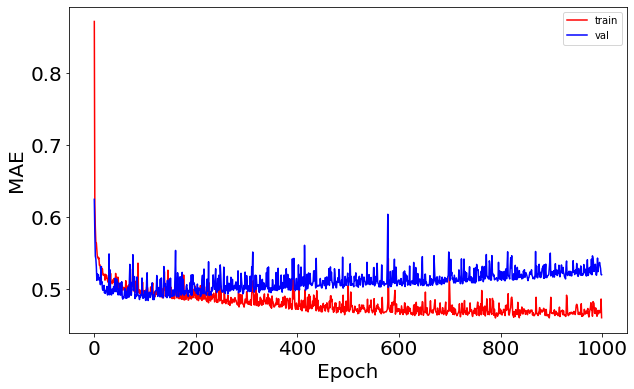

In [28]:
#Graficar el MAE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mae']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mae']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MAE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

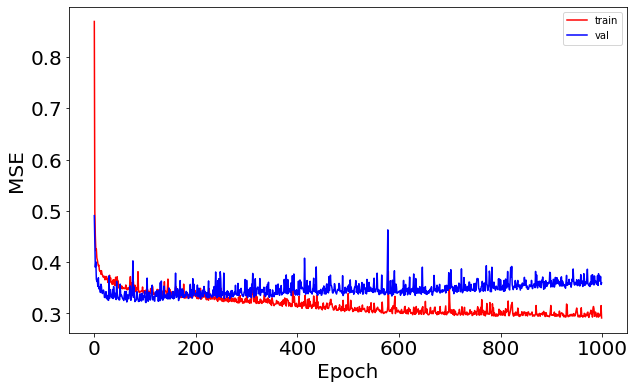

In [29]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Con los gráficos de arriba podemos observar que tanto las métricas de train y de validación disminuyen exponencialmentes con el incremento del número de épocas. 

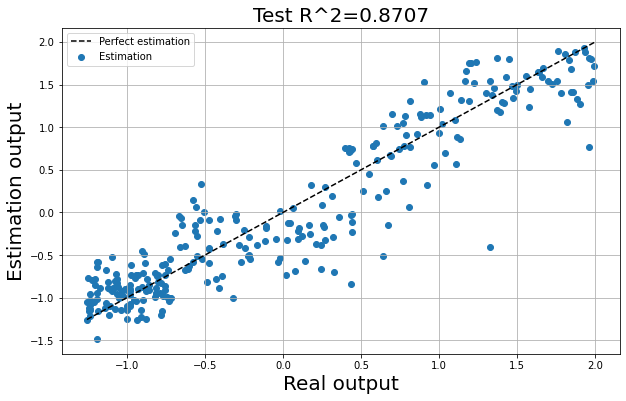

In [30]:
#Predecir
yhat = model.predict(X_test)

#Calcular R2
R2_score = r2_score(y_test,yhat)

#Graficar la R2
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [31]:
#Calcular métricas
mae_nn=metrics.mean_absolute_error(y_test, yhat)
mse_nn=metrics.mean_squared_error(y_test, yhat)
r2_nn=metrics.r2_score(y_test, yhat)

# imprimir Métricas
print('R2 square:',r2_nn)
print('MAE: ', mae_nn)
print('MSE: ', mse_nn)

R2 square: 0.8706525527241281
MAE:  0.27013962258312346
MSE:  0.12934744727587186


#### Resultados con train test split

In [32]:
data_compar_train_test = {'Modelo': ['LR', 'LR RFE', 'Ridge', 'RF', ' SVR', 'NN'], 'R2': [r2_lr, r2_rfe, r2_ridge, r2_rf, r2_svr, r2_nn], 'MSE': [mse_lr, mse_rfe, mse_ridge, mse_rf, mse_svr, mse_nn], 'MAE': [mae_lr, mae_rfe, mae_ridge,mae_rf,mae_svr, mae_nn]} 
data_compar_train_test = pd.DataFrame(data_compar_train_test)
data_compar_train_test

,Modelo,R2,MSE,MAE
0,LR,0.836411,0.163589,0.311901
1,LR RFE,0.836717,0.163283,0.311510
2,Ridge,0.836417,0.163583,0.311934
3,RF,0.908480,0.091520,0.214436
4,SVR,0.893997,0.106003,0.236861
5,NN,0.870653,0.129347,0.270140


### Cross Validation con optimización de hiperparámetros

La idea es dividir los datos en train y test, entrenar múltiples modelos muestreando los datos de entrenamiento. 
Finalmente probar el modelo en el test set



<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/700/1*4G__SV580CxFj78o9yUXuQ.png" width="450px" height="280px" />


In [33]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

#### Regresión Lineal

In [34]:
#Inicializar modelo
lm=LinearRegression()

#Hacer el cross validation y probar con el train
r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_lr)
print("MAE Train", mae_lr)
print("MSE Train", mse_lr)

R2 train 0.8158013380172221
MAE Train 0.3258039481837593
MSE Train 0.18158541560608504


In [35]:
#Performance en el test
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mae_lr=metrics.mean_absolute_error(y_test,y_pred)
mse_lr=metrics.mean_squared_error(y_test,y_pred)
r2_lr=metrics.r2_score(y_test,y_pred)

results_lr = pd.DataFrame([['Linear regression', mae_lr,mse_lr,r2_lr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_lr


,Model,MAE,MSE,R2
0,Linear regression,0.311901,0.163589,0.836411


#### Regresión lineal con selección de variables (RFE)

In [36]:
# Hacer el grid search
#Especificar el modelo
lm = LinearRegression()
#Ajustar datos
lm.fit(X_train, y_train)
#Inicializar modelo de Recursive Feature Elimination para selección de variables
rfe = RFE(lm)             

#Especificar rango de hiperparámetros a tunear
hyper_params = [{'n_features_to_select': list(range(1, np.shape(X_train)[1]+1))}]

# Crear el grid search
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      


#Performance en el test
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

mae_rfe=metrics.mean_absolute_error(y_test,y_pred)
mse_rfe=metrics.mean_squared_error(y_test,y_pred)
r2_rfe=metrics.r2_score(y_test,y_pred)

results_rfe = pd.DataFrame([['Linear regression RFE', mae_rfe,mse_rfe,r2_rfe]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rfe

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,Model,MAE,MSE,R2
0,Linear regression RFE,0.31151,0.163283,0.836717


#### Rigde

In [37]:
from sklearn.linear_model import RidgeCV
#Inicializar modelo de Ridge con cross validation para seleccionar el hiperparámetro de alpha óptimo
model = RidgeCV(alphas=np.arange(0.01,5,0.01), cv=kfold, scoring='neg_mean_squared_error') 
#Entreno modelo
model.fit(X_train, y_train)

#Alfa óptima
print('alfa: %f' % model.alpha_)

#Performance en el test
y_pred = model.predict(X_test)

mae_ridge=metrics.mean_absolute_error(y_test,y_pred)
mse_ridge=metrics.mean_squared_error(y_test,y_pred)
r2_ridge=metrics.r2_score(y_test,y_pred)

results_ridge = pd.DataFrame([['Linear regression Ridge', mae_ridge,mse_ridge,r2_ridge]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_ridge

alfa: 4.240000


,Model,MAE,MSE,R2
0,Linear regression Ridge,0.312042,0.163572,0.836428


#### Random Forest



In [39]:
from sklearn.ensemble import RandomForestRegressor

#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV
#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': [100, 300, 500, 800], #número de árboles
                                'criterion': ['mse']}, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print(gs.best_params_)

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

{'criterion': 'mse', 'max_depth': 8, 'min_samples_split': 30, 'n_estimators': 800}


In [40]:
#crear modelo usando parámetros óptimos
new_model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=8,
                               min_samples_split=30,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0)
#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\ensembl

R2 train 0.8920603214443167
MAE Train 0.21984381446970488
MSE Train 0.10667653653789569


In [41]:
#Performance en el test
y_pred = new_model_RF.predict(X_test)

mae_rf=metrics.mean_absolute_error(y_test,y_pred)
mse_rf=metrics.mean_squared_error(y_test,y_pred)
r2_rf=metrics.r2_score(y_test,y_pred)

results_rf = pd.DataFrame([['Random Forest', mae_rf,mse_rf,r2_rf]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rf

,Model,MAE,MSE,R2
0,Random Forest,0.208829,0.085517,0.914483


#### Árbol de decisión

In [42]:
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 50}


In [43]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=50)

#Entreno modelo optimizado
new_model_tree.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_tree= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_tree= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_tree)
print("MAE Train", mae_tree)
print("MSE Train", mse_tree)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663606


In [44]:
#Performance en el test
y_pred = new_model_tree.predict(X_test)

mae_tree=metrics.mean_absolute_error(y_test,y_pred)
mse_tree=metrics.mean_squared_error(y_test,y_pred)
r2_tree=metrics.r2_score(y_test,y_pred)

results_tree = pd.DataFrame([['Decision Tree', mae_tree,mse_tree,r2_tree]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_tree 

,Model,MAE,MSE,R2
0,Decision Tree,0.2231,0.108104,0.891896


#### Máquina de vector soporte (SVR)

In [45]:
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [46]:
#crear modelo usando parámetros óptimos
new_model_svr = SVR(kernel='rbf', C=1000, gamma=0.001)

#Entreno modelo optimizado
new_model_svr.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_svr= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_svr= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_svr= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_svr)
print("MAE Train", mae_svr)
print("MSE Train", mse_svr)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663606


In [47]:
#Performance en el test
y_pred = new_model_svr.predict(X_test)

mae_svr=metrics.mean_absolute_error(y_test,y_pred)
mse_svr=metrics.mean_squared_error(y_test,y_pred)
r2_svr=metrics.r2_score(y_test,y_pred)

results_svr = pd.DataFrame([['SVR', mae_svr,mse_svr,r2_svr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_svr 

,Model,MAE,MSE,R2
0,SVR,0.257272,0.118553,0.881447


#### Red Neuronal

In [49]:
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Optimizer configuration
    opt = tensorflow.keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

print('Mejores parámetros:')
print(grid_result.best_params_)


Epoch 1/200


C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_8796/698256605.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)
C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5533 - mse: 0.5533
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1983 - mse: 0.1983
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1838 - mse: 0.1838
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1679 - mse: 0.1679
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1615 - mse: 0.1615
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1558 - mse: 0.1558
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1647 - mse: 0.1647
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1584 - mse: 0.1584
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1590 - mse: 0.1590
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1421 - mse: 0.1421
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1203 - mse: 0.1203
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1188 - mse: 0.1188
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1158 - mse: 0.1158
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1214 - mse: 0.1214
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1135 - mse: 0.1135
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 0.1043
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1116 - mse: 0.1116
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1189 - mse: 0.1189
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1136 - mse: 0.1136
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1081 - mse: 0.1081
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1081 - mse: 0.1081
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1103 - mse: 0.1103
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1135 - mse: 0.1135
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6977 - mse: 0.6977
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3129 - mse: 0.3129
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2238 - mse: 0.2238
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2184 - mse: 0.2184
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2030 - mse: 0.2030
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2492 - mse: 0.2492
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1621 - mse: 0.1621
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1865 - mse: 0.1865
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1629 - mse: 0.1629
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1607 - mse: 0.1607
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.1167
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1162 - mse: 0.1162
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1341 - mse: 0.1341
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1288 - mse: 0.1288
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1302 - mse: 0.1302
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1280 - mse: 0.1280
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1290 - mse: 0.1290
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1204 - mse: 0.1204
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1189 - mse: 0.1189
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1406 - mse: 0.1406
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1287 - mse: 0.1287
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 0.1095
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1172 - mse: 0.1172
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1126 - mse: 0.1126
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4351 - mse: 0.4351
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1683 - mse: 0.1683
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1478 - mse: 0.1478
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1418 - mse: 0.1418
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1482 - mse: 0.1482
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1301 - mse: 0.1301
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1317 - mse: 0.1317
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1269 - mse: 0.1269
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1336 - mse: 0.1336
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1207 - mse: 0.1207
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1070 - mse: 0.1070
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1045 - mse: 0.1045
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1019 - mse: 0.1019
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.1028
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1099 - mse: 0.1099
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1090 - mse: 0.1090
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1071 - mse: 0.1071
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1011 - mse: 0.1011
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.0988 - mse: 0.0988
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0995 - mse: 0.0995
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1033 - mse: 0.1033
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0998 - mse: 0.0998
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0997 - mse: 0.0997
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0992 - mse: 0.0992
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0994 - mse: 0.0994
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1015 - mse: 0.1015
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1086 - mse: 0.1086
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1016 - mse: 0.1016
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.3716 - mse: 0.3716
Epoch 2/200
17/17 [==============================] - 0s 985us/step - loss: 0.1905 - mse: 0.1905
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1739 - mse: 0.1739
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1661 - mse: 0.1661
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1632 - mse: 0.1632
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1556 - mse: 0.1556
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1697 - mse: 0.1697
Epoch 8/200
17/17 [==============================] - 0s 987us/step - loss: 0.1759 - mse: 0.1759
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1473 - mse: 0.1473
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1393 - mse: 0.1393
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1163 - mse: 0.1163
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1235 - mse: 0.1235
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1167 - mse: 0.1167
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 0.1182
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1241 - mse: 0.1241
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1331 - mse: 0.1331
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1288 - mse: 0.1288
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1081 - mse: 0.1081
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1122 - mse: 0.1122
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1094 - mse: 0.1094
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1069 - mse: 0.1069
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1217 - mse: 0.1217
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1090 - mse: 0.1090
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.3844 - mse: 0.3844
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1977 - mse: 0.1977
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1827 - mse: 0.1827
Epoch 4/200
17/17 [==============================] - 0s 985us/step - loss: 0.1932 - mse: 0.1932
Epoch 5/200
17/17 [==============================] - 0s 972us/step - loss: 0.1659 - mse: 0.1659
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1632 - mse: 0.1632
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1600 - mse: 0.1600
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1551 - mse: 0.1551
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1495 - mse: 0.1495
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1620 - mse: 0.1620
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 991us/step - loss: 0.1154 - mse: 0.1154
Epoch 88/200
17/17 [==============================] - 0s 985us/step - loss: 0.1304 - mse: 0.1304
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1279 - mse: 0.1279
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1161 - mse: 0.1161
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1119 - mse: 0.1119
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.1176
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1240 - mse: 0.1240
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1302 - mse: 0.1302
Epoch 97/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1063 - mse: 0.1063
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1092 - mse: 0.1092
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1063 - mse: 0.1063
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1040 - mse: 0.1040
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1061 - mse: 0.1061
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1084 - mse: 0.1084
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 181/200
17/17 [==============================] - 0s 963us/step - loss: 0.1090 - mse: 0.1090
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4061 - mse: 0.4061
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1819 - mse: 0.1819
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1648 - mse: 0.1648
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1617 - mse: 0.1617
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1541 - mse: 0.1541
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1501 - mse: 0.1501
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1565 - mse: 0.1565
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1482 - mse: 0.1482
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1518 - mse: 0.1518
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1419 - mse: 0.1419
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 88/200
17/17 [==============================] - 0s 997us/step - loss: 0.1175 - mse: 0.1175
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1307 - mse: 0.1307
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1203 - mse: 0.1203
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1154 - mse: 0.1154
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1148 - mse: 0.1148
Epoch 173/200
17/17 [==============================] - 0s 982us/step - loss: 0.1063 - mse: 0.1063
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1117 - mse: 0.1117
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1061 - mse: 0.1061
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1080 - mse: 0.1080
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1054 - mse: 0.1054
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1084 - mse: 0.1084
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1097 - mse: 0.1097
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.1108
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.3989 - mse: 0.3989
Epoch 2/200
17/17 [==============================] - 0s 985us/step - loss: 0.1818 - mse: 0.1818
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1707 - mse: 0.1707
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1627 - mse: 0.1627
Epoch 5/200
17/17 [==============================] - 0s 966us/step - loss: 0.1573 - mse: 0.1573
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1505 - mse: 0.1505
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1545 - mse: 0.1545
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1604 - mse: 0.1604
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1462 - mse: 0.1462
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1516 - mse: 0.1516
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1213 - mse: 0.1213
Epoch 88/200
17/17 [==============================] - 0s 1000us/step - loss: 0.1158 - mse: 0.1158
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1216 - mse: 0.1216
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1205 - mse: 0.1205
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1238 - mse: 0.1238
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1220 - mse: 0.1220
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 97/200
17/17 [==============================] - 0s 1ms

17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1092 - mse: 0.1092
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1129 - mse: 0.1129
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1110 - mse: 0.1110
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1077 - mse: 0.1077
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1073 - mse: 0.1073
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1089 - mse: 0.1089
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1129 - mse: 0.1129
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1079 - mse: 0.1079
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 913us/step - loss: 0.3225 - mse: 0.3225
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1613 - mse: 0.1613
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1586 - mse: 0.1586
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1468 - mse: 0.1468
Epoch 5/200
17/17 [==============================] - 0s 948us/step - loss: 0.1452 - mse: 0.1452
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1433 - mse: 0.1433
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1453 - mse: 0.1453
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1435 - mse: 0.1435
Epoch 9/200
17/17 [==============================] - 0s 995us/step - loss: 0.1388 - mse: 0.1388
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1357 - mse: 0.1357
Epoch 11/200
17/17 [==============================] - 0s 1ms/step

17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1122 - mse: 0.1122
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1077 - mse: 0.1077
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1042 - mse: 0.1042
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1109 - mse: 0.1109
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 0.1101
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 95/200
17/17 [==============================] - 0s 954us/step - loss: 0.1124 - mse: 0.1124
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1084 - mse: 0.1084
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.0997 - mse: 0.0997
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0955 - mse: 0.0955
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1045 - mse: 0.1045
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1058 - mse: 0.1058
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.1121
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0964 - mse: 0.0964
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1022 - mse: 0.1022
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.1028
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1038 - mse: 0.1038
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.3204 - mse: 0.3204
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1672 - mse: 0.1672
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1601 - mse: 0.1601
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1728 - mse: 0.1728
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1546 - mse: 0.1546
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1550 - mse: 0.1550
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1485 - mse: 0.1485
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1500 - mse: 0.1500
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1478 - mse: 0.1478
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1432 - mse: 0.1432
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1274 - mse: 0.1274
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1214 - mse: 0.1214
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1187 - mse: 0.1187
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1203 - mse: 0.1203
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 96/200
17/17 [==============================] - 0s 958us/step - loss: 0.1219 - mse: 0.1219
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1011 - mse: 0.1011
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1020 - mse: 0.1020
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 0.1043
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1022 - mse: 0.1022
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1014 - mse: 0.1014
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1010 - mse: 0.1010
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1029 - mse: 0.1029
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1068 - mse: 0.1068
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1039 - mse: 0.1039
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1019 - mse: 0.1019
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.3864 - mse: 0.3864
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1777 - mse: 0.1777
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1695 - mse: 0.1695
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1603 - mse: 0.1603
Epoch 5/200
17/17 [==============================] - 0s 978us/step - loss: 0.1618 - mse: 0.1618
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1548 - mse: 0.1548
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1555 - mse: 0.1555
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1523 - mse: 0.1523
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1476 - mse: 0.1476
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1439 - mse: 0.1439
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1374 - mse: 0.1374
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1313 - mse: 0.1313
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1251 - mse: 0.1251
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1212 - mse: 0.1212
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1234 - mse: 0.1234
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1263 - mse: 0.1263
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.1199
Epoch 173/200
17/17 [==============================] - 0s 993us/step - loss: 0.1193 - mse: 0.1193
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.1176
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1124 - mse: 0.1124
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1135 - mse: 0.1135
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1219 - mse: 0.1219
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1268 - mse: 0.1268
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.3216 - mse: 0.3216
Epoch 2/200
17/17 [==============================] - 0s 971us/step - loss: 0.1741 - mse: 0.1741
Epoch 3/200
17/17 [==============================] - 0s 944us/step - loss: 0.1627 - mse: 0.1627
Epoch 4/200
17/17 [==============================] - 0s 984us/step - loss: 0.1527 - mse: 0.1527
Epoch 5/200
17/17 [==============================] - 0s 987us/step - loss: 0.1502 - mse: 0.1502
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1433 - mse: 0.1433
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1417 - mse: 0.1417
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1429 - mse: 0.1429
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1427 - mse: 0.1427
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1405 - mse: 0.1405
Epoch 11/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1167 - mse: 0.1167
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1162 - mse: 0.1162
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1157 - mse: 0.1157
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1152 - mse: 0.1152
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.1199
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1172 - mse: 0.1172
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 0.1095
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1062 - mse: 0.1062
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1074 - mse: 0.1074
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1107 - mse: 0.1107
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1068 - mse: 0.1068
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1074 - mse: 0.1074
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1110 - mse: 0.1110
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.3419 - mse: 0.3419
Epoch 2/200
17/17 [==============================] - 0s 996us/step - loss: 0.1976 - mse: 0.1976
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1839 - mse: 0.1839
Epoch 4/200
17/17 [==============================] - 0s 969us/step - loss: 0.1799 - mse: 0.1799
Epoch 5/200
17/17 [==============================] - 0s 966us/step - loss: 0.1811 - mse: 0.1811
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1768 - mse: 0.1768
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1652 - mse: 0.1652
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1667 - mse: 0.1667
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1705 - mse: 0.1705
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1595 - mse: 0.1595
Epoch 11/200
17/17 [==============================] - 0s 1ms/step

17/17 [==============================] - 0s 1ms/step - loss: 0.1276 - mse: 0.1276
Epoch 88/200
17/17 [==============================] - 0s 976us/step - loss: 0.1248 - mse: 0.1248
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1247 - mse: 0.1247
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1300 - mse: 0.1300
Epoch 92/200
17/17 [==============================] - 0s 937us/step - loss: 0.1292 - mse: 0.1292
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1297 - mse: 0.1297
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1281 - mse: 0.1281
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1266 - mse: 0.1266
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1338 - mse: 0.1338
Epoch 97/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.1176
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1160 - mse: 0.1160
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1188 - mse: 0.1188
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1203 - mse: 0.1203
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1185 - mse: 0.1185
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4617 - mse: 0.4617
Epoch 2/200
17/17 [==============================] - 0s 998us/step - loss: 0.1844 - mse: 0.1844
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1414 - mse: 0.1414
Epoch 5/200
17/17 [==============================] - 0s 994us/step - loss: 0.1365 - mse: 0.1365
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1321 - mse: 0.1321
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1298 - mse: 0.1298
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1289 - mse: 0.1289
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1277 - mse: 0.1277
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1325 - mse: 0.1325
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1057 - mse: 0.1057
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1071 - mse: 0.1071
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1039 - mse: 0.1039
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1042 - mse: 0.1042
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 0.1101
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1062 - mse: 0.1062
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1087 - mse: 0.1087
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1061 - mse: 0.1061
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1111 - mse: 0.1111
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.1028
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1013 - mse: 0.1013
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1000 - mse: 0.1000
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1031 - mse: 0.1031
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1052 - mse: 0.1052
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1087 - mse: 0.1087
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1015 - mse: 0.1015
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1004 - mse: 0.1004
Epoch 180/200
17/17 [==============================] - 0s 986us/step - loss: 0.1024 - mse: 0.1024
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1014 - mse: 0.1014
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4464 - mse: 0.4464
Epoch 2/200
17/17 [==============================] - 0s 1000us/step - loss: 0.1950 - mse: 0.1950
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1843 - mse: 0.1843
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1771 - mse: 0.1771
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1595 - mse: 0.1595
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1512 - mse: 0.1512
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1554 - mse: 0.1554
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1451 - mse: 0.1451
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1466 - mse: 0.1466
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1474 - mse: 0.1474
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - 

17/17 [==============================] - 0s 1ms/step - loss: 0.1158 - mse: 0.1158
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1214 - mse: 0.1214
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1160 - mse: 0.1160
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1205 - mse: 0.1205
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.1199
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1042 - mse: 0.1042
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1041 - mse: 0.1041
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1049 - mse: 0.1049
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1098 - mse: 0.1098
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1025 - mse: 0.1025
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1070 - mse: 0.1070
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1027 - mse: 0.1027
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1035 - mse: 0.1035
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1092 - mse: 0.1092
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 439us/step - loss: 0.6111 - mse: 0.6111
Epoch 2/200
17/17 [==============================] - 0s 875us/step - loss: 0.2038 - mse: 0.2038
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1807 - mse: 0.1807
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1695 - mse: 0.1695
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1696 - mse: 0.1696
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1655 - mse: 0.1655
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1596 - mse: 0.1596
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1568 - mse: 0.1568
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1552 - mse: 0.1552
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1535 - mse: 0.1535
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1192 - mse: 0.1192
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1219 - mse: 0.1219
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1158 - mse: 0.1158
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1204 - mse: 0.1204
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1003 - mse: 0.1003
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0982 - mse: 0.0982
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0998 - mse: 0.0998
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1025 - mse: 0.1025
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1009 - mse: 0.1009
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1060 - mse: 0.1060
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1061 - mse: 0.1061
Epoch 179/200
17/17 [==============================] - 0s 997us/step - loss: 0.1017 - mse: 0.1017
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1018 - mse: 0.1018
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0973 - mse: 0.0973
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.3457 - mse: 0.3457
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1718 - mse: 0.1718
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1555 - mse: 0.1555
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1427 - mse: 0.1427
Epoch 5/200
17/17 [==============================] - 0s 980us/step - loss: 0.1428 - mse: 0.1428
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1382 - mse: 0.1382
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1375 - mse: 0.1375
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1376 - mse: 0.1376
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1427 - mse: 0.1427
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1338 - mse: 0.1338
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 1ms/step - loss: 0.1119 - mse: 0.1119
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1068 - mse: 0.1068
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1102 - mse: 0.1102
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1142 - mse: 0.1142
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1100 - mse: 0.1100
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1233 - mse: 0.1233
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.0981 - mse: 0.0981
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1070 - mse: 0.1070
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0943 - mse: 0.0943
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0992 - mse: 0.0992
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0946 - mse: 0.0946
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1078 - mse: 0.1078
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0921 - mse: 0.0921
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0928 - mse: 0.0928
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0932 - mse: 0.0932
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0938 - mse: 0.0938
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6324 - mse: 0.6324
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1996 - mse: 0.1996
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1639 - mse: 0.1639
Epoch 4/200
17/17 [==============================] - 0s 992us/step - loss: 0.1774 - mse: 0.1774
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1731 - mse: 0.1731
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1739 - mse: 0.1739
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1622 - mse: 0.1622
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1545 - mse: 0.1545
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1567 - mse: 0.1567
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1518 - mse: 0.1518
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 1ms/step - loss: 0.1239 - mse: 0.1239
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 0.1286
Epoch 89/200
17/17 [==============================] - 0s 997us/step - loss: 0.1220 - mse: 0.1220
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1263 - mse: 0.1263
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1210 - mse: 0.1210
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1274 - mse: 0.1274
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1269 - mse: 0.1269
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1210 - mse: 0.1210
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 2ms/step - loss: 0.1324 - mse: 0.1324
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1157 - mse: 0.1157
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1245 - mse: 0.1245
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1104 - mse: 0.1104
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1187 - mse: 0.1187
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4594 - mse: 0.4594
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1580 - mse: 0.1580
Epoch 3/200
17/17 [==============================] - 0s 981us/step - loss: 0.1512 - mse: 0.1512
Epoch 4/200
17/17 [==============================] - 0s 963us/step - loss: 0.1458 - mse: 0.1458
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1387 - mse: 0.1387
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1375 - mse: 0.1375
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1350 - mse: 0.1350
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1329 - mse: 0.1329
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 0.1286
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1324 - mse: 0.1324
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 2ms/step - loss: 0.1045 - mse: 0.1045
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1053 - mse: 0.1053
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1069 - mse: 0.1069
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1051 - mse: 0.1051
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1037 - mse: 0.1037
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1046 - mse: 0.1046
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1042 - mse: 0.1042
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1053 - mse: 0.1053
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1000 - mse: 0.1000
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0999 - mse: 0.0999
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0985 - mse: 0.0985
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0990 - mse: 0.0990
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1019 - mse: 0.1019
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1037 - mse: 0.1037
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1047 - mse: 0.1047
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0981 - mse: 0.0981
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0979 - mse: 0.0979
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0970 - mse: 0.0970
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4437 - mse: 0.4437
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1847 - mse: 0.1847
Epoch 3/200
17/17 [==============================] - 0s 977us/step - loss: 0.1608 - mse: 0.1608
Epoch 4/200
17/17 [==============================] - 0s 997us/step - loss: 0.1565 - mse: 0.1565
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1506 - mse: 0.1506
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1526 - mse: 0.1526
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1590 - mse: 0.1590
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1649 - mse: 0.1649
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1469 - mse: 0.1469
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1522 - mse: 0.1522
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1244 - mse: 0.1244
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1242 - mse: 0.1242
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1251 - mse: 0.1251
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 997us/step - loss: 0.1077 - mse: 0.1077
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1122 - mse: 0.1122
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1132 - mse: 0.1132
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1136 - mse: 0.1136
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1036 - mse: 0.1036
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1054 - mse: 0.1054
Epoch 179/200
17/17 [==============================] - 0s 980us/step - loss: 0.1114 - mse: 0.1114
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1047 - mse: 0.1047
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1058 - mse: 0.1058
Epoch 182/200
17/17 [=============================

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4353 - mse: 0.4353
Epoch 2/200
17/17 [==============================] - 0s 997us/step - loss: 0.2003 - mse: 0.2003
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1744 - mse: 0.1744
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1660 - mse: 0.1660
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1614 - mse: 0.1614
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1554 - mse: 0.1554
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1519 - mse: 0.1519
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1787 - mse: 0.1787
Epoch 9/200
17/17 [==============================] - 0s 997us/step - loss: 0.1509 - mse: 0.1509
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1233 - mse: 0.1233
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1172 - mse: 0.1172
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1126 - mse: 0.1126
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1120 - mse: 0.1120
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1031 - mse: 0.1031
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1000 - mse: 0.1000
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1009 - mse: 0.1009
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1010 - mse: 0.1010
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1053 - mse: 0.1053
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1008 - mse: 0.1008
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1048 - mse: 0.1048
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1076 - mse: 0.1076
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 0.1043
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4183 - mse: 0.4183
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1946 - mse: 0.1946
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1672 - mse: 0.1672
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1601 - mse: 0.1601
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1520 - mse: 0.1520
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1473 - mse: 0.1473
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1440 - mse: 0.1440
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1468 - mse: 0.1468
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1402 - mse: 0.1402
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1376 - mse: 0.1376
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 0.1125
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1083 - mse: 0.1083
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1082 - mse: 0.1082
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1069 - mse: 0.1069
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1104 - mse: 0.1104
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1072 - mse: 0.1072
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1103 - mse: 0.1103
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1084 - mse: 0.1084
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1100 - mse: 0.1100
Epoch 96/200
17/17 [==============================] - 0s 997us/step - loss: 0.1081 - mse: 0.1081
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1035 - mse: 0.1035
Epoch 173/200
17/17 [==============================] - 0s 966us/step - loss: 0.1064 - mse: 0.1064
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1042 - mse: 0.1042
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1038 - mse: 0.1038
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1065 - mse: 0.1065
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1036 - mse: 0.1036
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1025 - mse: 0.1025
Epoch 179/200
17/17 [==============================] - 0s 983us/step - loss: 0.1051 - mse: 0.1051
Epoch 180/200
17/17 [==============================] - 0s 982us/step - loss: 0.1021 - mse: 0.1021
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1025 - mse: 0.1025
Epoch 182/200
17/17 [===========================

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.6364 - mse: 0.6364
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2080 - mse: 0.2080
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1796 - mse: 0.1796
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1694 - mse: 0.1694
Epoch 5/200
17/17 [==============================] - 0s 981us/step - loss: 0.1680 - mse: 0.1680
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1595 - mse: 0.1595
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1565 - mse: 0.1565
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1535 - mse: 0.1535
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1498 - mse: 0.1498
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1509 - mse: 0.1509
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 999us/step - loss: 0.1308 - mse: 0.1308
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1244 - mse: 0.1244
Epoch 89/200
17/17 [==============================] - 0s 997us/step - loss: 0.1252 - mse: 0.1252
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1290 - mse: 0.1290
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1321 - mse: 0.1321
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1314 - mse: 0.1314
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1327 - mse: 0.1327
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1291 - mse: 0.1291
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1268 - mse: 0.1268
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1331 - mse: 0.1331
Epoch 97/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 973us/step - loss: 0.1130 - mse: 0.1130
Epoch 173/200
17/17 [==============================] - 0s 999us/step - loss: 0.1170 - mse: 0.1170
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1133 - mse: 0.1133
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1154 - mse: 0.1154
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.1176
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1172 - mse: 0.1172
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1164 - mse: 0.1164
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 182/200
17/17 [=============================

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.4956 - mse: 0.4956
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2205 - mse: 0.2205
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1869 - mse: 0.1869
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1732 - mse: 0.1732
Epoch 5/200
17/17 [==============================] - 0s 995us/step - loss: 0.1612 - mse: 0.1612
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1484 - mse: 0.1484
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1516 - mse: 0.1516
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1420 - mse: 0.1420
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1401 - mse: 0.1401
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 1ms/step - loss: 0.1075 - mse: 0.1075
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1122 - mse: 0.1122
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1114 - mse: 0.1114
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1084 - mse: 0.1084
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 93/200
17/17 [==============================] - 0s 995us/step - loss: 0.1103 - mse: 0.1103
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1079 - mse: 0.1079
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1112 - mse: 0.1112
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1039 - mse: 0.1039
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1068 - mse: 0.1068
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1022 - mse: 0.1022
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1031 - mse: 0.1031
Epoch 176/200
17/17 [==============================] - 0s 962us/step - loss: 0.1019 - mse: 0.1019
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1036 - mse: 0.1036
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1035 - mse: 0.1035
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1013 - mse: 0.1013
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1054 - mse: 0.1054
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1041 - mse: 0.1041
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.3537 - mse: 0.3537
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1920 - mse: 0.1920
Epoch 3/200
17/17 [==============================] - 0s 907us/step - loss: 0.1703 - mse: 0.1703
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1562 - mse: 0.1562
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1531 - mse: 0.1531
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1459 - mse: 0.1459
Epoch 7/200
17/17 [==============================] - 0s 997us/step - loss: 0.1468 - mse: 0.1468
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1417 - mse: 0.1417
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1384 - mse: 0.1384
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1173 - mse: 0.1173
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1158 - mse: 0.1158
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1212 - mse: 0.1212
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1189 - mse: 0.1189
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1151 - mse: 0.1151
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1083 - mse: 0.1083
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1119 - mse: 0.1119
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1081 - mse: 0.1081
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1098 - mse: 0.1098
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1130 - mse: 0.1130
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1158 - mse: 0.1158
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1091 - mse: 0.1091
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1079 - mse: 0.1079
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 0.1095
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1089 - mse: 0.1089
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.3820 - mse: 0.3820
Epoch 2/200
17/17 [==============================] - 0s 969us/step - loss: 0.1843 - mse: 0.1843
Epoch 3/200
17/17 [==============================] - 0s 999us/step - loss: 0.1679 - mse: 0.1679
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1623 - mse: 0.1623
Epoch 5/200
17/17 [==============================] - 0s 970us/step - loss: 0.1604 - mse: 0.1604
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1620 - mse: 0.1620
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1563 - mse: 0.1563
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1533 - mse: 0.1533
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1495 - mse: 0.1495
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1479 - mse: 0.1479
Epoch 11/200
17/17 [==============================] - 0s 1ms/step

17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1153 - mse: 0.1153
Epoch 89/200
17/17 [==============================] - 0s 999us/step - loss: 0.1124 - mse: 0.1124
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1126 - mse: 0.1126
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1114 - mse: 0.1114
Epoch 92/200
17/17 [==============================] - 0s 998us/step - loss: 0.1132 - mse: 0.1132
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1130 - mse: 0.1130
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.1121
Epoch 96/200
17/17 [==============================] - 0s 988us/step - loss: 0.1118 - mse: 0.1118
Epoch 97/200
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 1ms/step - loss: 0.1045 - mse: 0.1045
Epoch 173/200
17/17 [==============================] - 0s 965us/step - loss: 0.1066 - mse: 0.1066
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1038 - mse: 0.1038
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1036 - mse: 0.1036
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1059 - mse: 0.1059
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1024 - mse: 0.1024
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1038 - mse: 0.1038
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1055 - mse: 0.1055
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1036 - mse: 0.1036
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1076 - mse: 0.1076
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.3600 - mse: 0.3600
Epoch 2/200
17/17 [==============================] - 0s 974us/step - loss: 0.1826 - mse: 0.1826
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1633 - mse: 0.1633
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1584 - mse: 0.1584
Epoch 5/200
17/17 [==============================] - 0s 970us/step - loss: 0.1549 - mse: 0.1549
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1520 - mse: 0.1520
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1501 - mse: 0.1501
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1500 - mse: 0.1500
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1503 - mse: 0.1503
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1489 - mse: 0.1489
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 0.1182
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.1176
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1102 - mse: 0.1102
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1103 - mse: 0.1103
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1106 - mse: 0.1106
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1100 - mse: 0.1100
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1132 - mse: 0.1132
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1101 - mse: 0.1101
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1112 - mse: 0.1112
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1096 - mse: 0.1096
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5034 - mse: 0.5034
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2361 - mse: 0.2361
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2054 - mse: 0.2054
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1940 - mse: 0.1940
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1794 - mse: 0.1794
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1728 - mse: 0.1728
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1690 - mse: 0.1690
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1653 - mse: 0.1653
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1593 - mse: 0.1593
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1571 - mse: 0.1571
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1288 - mse: 0.1288
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 0.1255
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1308 - mse: 0.1308
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1267 - mse: 0.1267
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1241 - mse: 0.1241
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1266 - mse: 0.1266
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.1259
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1204 - mse: 0.1204
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1243 - mse: 0.1243
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1185 - mse: 0.1185
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1172 - mse: 0.1172
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1199 - mse: 0.1199
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 396us/step - loss: 0.3314 - mse: 0.3314
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2075 - mse: 0.2075
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1904 - mse: 0.1904
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1755 - mse: 0.1755
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1690 - mse: 0.1690
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1590 - mse: 0.1590
Epoch 7/200
17/17 [==============================] - 0s 591us/step - loss: 0.1522 - mse: 0.1522
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1458 - mse: 0.1458
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1416 - mse: 0.1416
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1388 - mse: 0.1388
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1071 - mse: 0.1071
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1070 - mse: 0.1070
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1082 - mse: 0.1082
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1053 - mse: 0.1053
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1075 - mse: 0.1075
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1080 - mse: 0.1080
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1057 - mse: 0.1057
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1082 - mse: 0.1082
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1083 - mse: 0.1083
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1044 - mse: 0.1044
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1026 - mse: 0.1026
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1025 - mse: 0.1025
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0995 - mse: 0.0995
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1003 - mse: 0.1003
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0999 - mse: 0.0999
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1007 - mse: 0.1007
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0986 - mse: 0.0986
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1007 - mse: 0.1007
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1016 - mse: 0.1016
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1024 - mse: 0.1024
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4306 - mse: 0.4306
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2470 - mse: 0.2470
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2101 - mse: 0.2101
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1941 - mse: 0.1941
Epoch 5/200
17/17 [==============================] - 0s 743us/step - loss: 0.1861 - mse: 0.1861
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1807 - mse: 0.1807
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1748 - mse: 0.1748
Epoch 8/200
17/17 [==============================] - 0s 815us/step - loss: 0.1741 - mse: 0.1741
Epoch 9/200
17/17 [==============================] - 0s 977us/step - loss: 0.1710 - mse: 0.1710
Epoch 10/200
17/17 [==============================] - 0s 979us/step - loss: 0.1668 - mse: 0.1668
Epoch 11/200
17/17 [==============================] - 0s 979us/

17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1212 - mse: 0.1212
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1213 - mse: 0.1213
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1229
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1235 - mse: 0.1235
Epoch 95/200
17/17 [==============================] - 0s 976us/step - loss: 0.1217 - mse: 0.1217
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1160 - mse: 0.1160
Epoch 174/200
17/17 [==============================] - 0s 995us/step - loss: 0.1168 - mse: 0.1168
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1143 - mse: 0.1143
Epoch 178/200
17/17 [==============================] - 0s 999us/step - loss: 0.1151 - mse: 0.1151
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1170 - mse: 0.1170
Epoch 182/200
17/17 [=============================

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 992us/step - loss: 0.5955 - mse: 0.5955
Epoch 2/200
17/17 [==============================] - 0s 990us/step - loss: 0.3452 - mse: 0.3452
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2881 - mse: 0.2881
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2493 - mse: 0.2493
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2228 - mse: 0.2228
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2033 - mse: 0.2033
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1975 - mse: 0.1975
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1854 - mse: 0.1854
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1851 - mse: 0.1851
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1782 - mse: 0.1782
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1270 - mse: 0.1270
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1308 - mse: 0.1308
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1270 - mse: 0.1270
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1269 - mse: 0.1269
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1269 - mse: 0.1269
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1232 - mse: 0.1232
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1256 - mse: 0.1256
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 0.1211
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1194 - mse: 0.1194
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1188 - mse: 0.1188
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1205 - mse: 0.1205
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.4341 - mse: 0.4341
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2453 - mse: 0.2453
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2214 - mse: 0.2214
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2071 - mse: 0.2071
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1939 - mse: 0.1939
Epoch 6/200
17/17 [==============================] - 0s 986us/step - loss: 0.1849 - mse: 0.1849
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1783 - mse: 0.1783
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1750 - mse: 0.1750
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1661 - mse: 0.1661
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1643 - mse: 0.1643
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 1ms/step - loss: 0.1240 - mse: 0.1240
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 0.1230
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1231 - mse: 0.1231
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1235 - mse: 0.1235
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1229
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1249 - mse: 0.1249
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1244 - mse: 0.1244
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1232 - mse: 0.1232
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1219 - mse: 0.1219
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1233 - mse: 0.1233
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1170 - mse: 0.1170
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1161 - mse: 0.1161
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1160 - mse: 0.1160
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.6815 - mse: 0.6815
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2929 - mse: 0.2929
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2211 - mse: 0.2211
Epoch 4/200
17/17 [==============================] - 0s 982us/step - loss: 0.1941 - mse: 0.1941
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1800 - mse: 0.1800
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1733 - mse: 0.1733
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1679 - mse: 0.1679
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1604 - mse: 0.1604
Epoch 9/200
17/17 [==============================] - 0s 1000us/step - loss: 0.1589 - mse: 0.1589
Epoch 10/200
17/17 [==============================] - 0s 990us/step - loss: 0.1583 - mse: 0.1583
Epoch 11/200
17/17 [==============================] - 0s 1ms/ste

17/17 [==============================] - 0s 1ms/step - loss: 0.1282 - mse: 0.1282
Epoch 88/200
17/17 [==============================] - 0s 984us/step - loss: 0.1250 - mse: 0.1250
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1263 - mse: 0.1263
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1275 - mse: 0.1275
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1300 - mse: 0.1300
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1260 - mse: 0.1260
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1265 - mse: 0.1265
Epoch 95/200
17/17 [==============================] - 0s 978us/step - loss: 0.1241 - mse: 0.1241
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1236 - mse: 0.1236
Epoch 97/200
17/17 [==============================] - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 173/200
17/17 [==============================] - 0s 988us/step - loss: 0.1197 - mse: 0.1197
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1188 - mse: 0.1188
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.7218 - mse: 0.7218
Epoch 2/200
17/17 [==============================] - 0s 999us/step - loss: 0.2808 - mse: 0.2808
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2225 - mse: 0.2225
Epoch 4/200
17/17 [==============================] - 0s 976us/step - loss: 0.1923 - mse: 0.1923
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1780 - mse: 0.1780
Epoch 6/200
17/17 [==============================] - 0s 998us/step - loss: 0.1672 - mse: 0.1672
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1589 - mse: 0.1589
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1535 - mse: 0.1535
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1504 - mse: 0.1504
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1496 - mse: 0.1496
Epoch 11/200
17/17 [==============================] - 0s 1ms/step

17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1133 - mse: 0.1133
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1133 - mse: 0.1133
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1126 - mse: 0.1126
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.1121
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1124 - mse: 0.1124
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1130 - mse: 0.1130
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1066 - mse: 0.1066
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1073 - mse: 0.1073
Epoch 174/200
17/17 [==============================] - 0s 989us/step - loss: 0.1075 - mse: 0.1075
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1085 - mse: 0.1085
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1075 - mse: 0.1075
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1061 - mse: 0.1061
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1056 - mse: 0.1056
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1077 - mse: 0.1077
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1081 - mse: 0.1081
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1057 - mse: 0.1057
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6710 - mse: 0.6710
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2252 - mse: 0.2252
Epoch 3/200
17/17 [==============================] - 0s 958us/step - loss: 0.1871 - mse: 0.1871
Epoch 4/200
17/17 [==============================] - 0s 997us/step - loss: 0.1774 - mse: 0.1774
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1740 - mse: 0.1740
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1671 - mse: 0.1671
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1631 - mse: 0.1631
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1592 - mse: 0.1592
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1561 - mse: 0.1561
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1529 - mse: 0.1529
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1201 - mse: 0.1201
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1207 - mse: 0.1207
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1198 - mse: 0.1198
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1208 - mse: 0.1208
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1181 - mse: 0.1181
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1198 - mse: 0.1198
Epoch 97/200
17/17 [==============================] - 0s 1000us

17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1116 - mse: 0.1116
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1159 - mse: 0.1159
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1129 - mse: 0.1129
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1134 - mse: 0.1134
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1142 - mse: 0.1142
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1133 - mse: 0.1133
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.9109 - mse: 0.9109
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3423 - mse: 0.3423
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2369 - mse: 0.2369
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1944 - mse: 0.1944
Epoch 5/200
17/17 [==============================] - 0s 984us/step - loss: 0.1786 - mse: 0.1786
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1704 - mse: 0.1704
Epoch 7/200
17/17 [==============================] - 0s 999us/step - loss: 0.1646 - mse: 0.1646
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1603 - mse: 0.1603
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1598 - mse: 0.1598
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1554 - mse: 0.1554
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1238 - mse: 0.1238
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1244 - mse: 0.1244
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1280 - mse: 0.1280
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1246 - mse: 0.1246
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 0.1211
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 0.1230
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1146 - mse: 0.1146
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 174/200
17/17 [==============================] - 0s 994us/step - loss: 0.1142 - mse: 0.1142
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1157 - mse: 0.1157
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.1131
Epoch 177/200
17/17 [==============================] - 0s 999us/step - loss: 0.1127 - mse: 0.1127
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1142 - mse: 0.1142
Epoch 182/200
17/17 [=============================

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.8618 - mse: 0.8618
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4378 - mse: 0.4378
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2757 - mse: 0.2757
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2260 - mse: 0.2260
Epoch 5/200
17/17 [==============================] - 0s 989us/step - loss: 0.2042 - mse: 0.2042
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1919 - mse: 0.1919
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1840 - mse: 0.1840
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1800 - mse: 0.1800
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1758 - mse: 0.1758
Epoch 10/200
17/17 [==============================] - 0s 995us/step - loss: 0.1727 - mse: 0.1727
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 997us/step - loss: 0.1292 - mse: 0.1292
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1298 - mse: 0.1298
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1289 - mse: 0.1289
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1282 - mse: 0.1282
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 0.1286
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1279 - mse: 0.1279
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 0.1283
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1272 - mse: 0.1272
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1269 - mse: 0.1269
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1273 - mse: 0.1273
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1185 - mse: 0.1185
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1187 - mse: 0.1187
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1183 - mse: 0.1183
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1187 - mse: 0.1187
Epoch 181/200
17/17 [==============================] - 0s 997us/step - loss: 0.1185 - mse: 0.1185
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.8912 - mse: 0.8912
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5161 - mse: 0.5161
Epoch 3/200
17/17 [==============================] - 0s 955us/step - loss: 0.2968 - mse: 0.2968
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2316 - mse: 0.2316
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2115 - mse: 0.2115
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2028 - mse: 0.2028
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1949 - mse: 0.1949
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1878 - mse: 0.1878
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1836 - mse: 0.1836
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1802 - mse: 0.1802
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 1ms/step - loss: 0.1302 - mse: 0.1302
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1297 - mse: 0.1297
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1296 - mse: 0.1296
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1301 - mse: 0.1301
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1298 - mse: 0.1298
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1294 - mse: 0.1294
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1295 - mse: 0.1295
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1293 - mse: 0.1293
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1285 - mse: 0.1285
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1292 - mse: 0.1292
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 0.1211
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1207 - mse: 0.1207
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1207 - mse: 0.1207
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1210 - mse: 0.1210
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 0.1211
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1203 - mse: 0.1203
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6788 - mse: 0.6788
Epoch 2/200
17/17 [==============================] - 0s 967us/step - loss: 0.3727 - mse: 0.3727
Epoch 3/200
17/17 [==============================] - 0s 969us/step - loss: 0.3058 - mse: 0.3058
Epoch 4/200
17/17 [==============================] - 0s 997us/step - loss: 0.2703 - mse: 0.2703
Epoch 5/200
17/17 [==============================] - 0s 998us/step - loss: 0.2481 - mse: 0.2481
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2295 - mse: 0.2295
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2180 - mse: 0.2180
Epoch 8/200
17/17 [==============================] - 0s 1000us/step - loss: 0.2071 - mse: 0.2071
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1984 - mse: 0.1984
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1915 - mse: 0.1915
Epoch 11/200
17/17 [==============================] - 0s 1ms

17/17 [==============================] - 0s 1ms/step - loss: 0.1274 - mse: 0.1274
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1256 - mse: 0.1256
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1247 - mse: 0.1247
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 94/200
17/17 [==============================] - 0s 973us/step - loss: 0.1253 - mse: 0.1253
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1251 - mse: 0.1251
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1202 - mse: 0.1202
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1188 - mse: 0.1188
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1191 - mse: 0.1191
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1198 - mse: 0.1198
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 179/200
17/17 [==============================] - 0s 286us/step - loss: 0.1190 - mse: 0.1190
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1188 - mse: 0.1188
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1192 - mse: 0.1192
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.8860 - mse: 0.8860
Epoch 2/200
17/17 [==============================] - 0s 984us/step - loss: 0.5659 - mse: 0.5659
Epoch 3/200
17/17 [==============================] - 0s 997us/step - loss: 0.4009 - mse: 0.4009
Epoch 4/200
17/17 [==============================] - 0s 999us/step - loss: 0.3012 - mse: 0.3012
Epoch 5/200
17/17 [==============================] - 0s 937us/step - loss: 0.2466 - mse: 0.2466
Epoch 6/200
17/17 [==============================] - 0s 997us/step - loss: 0.2168 - mse: 0.2168
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1958 - mse: 0.1958
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1837 - mse: 0.1837
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1754 - mse: 0.1754
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1701 - mse: 0.1701
Epoch 11/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1329 - mse: 0.1329
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1326 - mse: 0.1326
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1322 - mse: 0.1322
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1324 - mse: 0.1324
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1324 - mse: 0.1324
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1320 - mse: 0.1320
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1319 - mse: 0.1319
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1319 - mse: 0.1319
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1324 - mse: 0.1324
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1318 - mse: 0.1318
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1264 - mse: 0.1264
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1272 - mse: 0.1272
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1263 - mse: 0.1263
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.1259
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1256 - mse: 0.1256
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1256 - mse: 0.1256
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1260 - mse: 0.1260
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.8842 - mse: 0.8842
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5540 - mse: 0.5540
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3151 - mse: 0.3151
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2437 - mse: 0.2437
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2223 - mse: 0.2223
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2089 - mse: 0.2089
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2022 - mse: 0.2022
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1949 - mse: 0.1949
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1905 - mse: 0.1905
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1873 - mse: 0.1873
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1367 - mse: 0.1367
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1363 - mse: 0.1363
Epoch 89/200
17/17 [==============================] - 0s 996us/step - loss: 0.1357 - mse: 0.1357
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1361 - mse: 0.1361
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1354 - mse: 0.1354
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1352 - mse: 0.1352
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1358 - mse: 0.1358
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1349 - mse: 0.1349
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 0.1347
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1340 - mse: 0.1340
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1234 - mse: 0.1234
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1235 - mse: 0.1235
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1231 - mse: 0.1231
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1236 - mse: 0.1236
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 178/200
17/17 [==============================] - 0s 993us/step - loss: 0.1226 - mse: 0.1226
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1216 - mse: 0.1216
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6213 - mse: 0.6213
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3149 - mse: 0.3149
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2250 - mse: 0.2250
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1971 - mse: 0.1971
Epoch 5/200
17/17 [==============================] - 0s 998us/step - loss: 0.1846 - mse: 0.1846
Epoch 6/200
17/17 [==============================] - 0s 968us/step - loss: 0.1783 - mse: 0.1783
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1735 - mse: 0.1735
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1700 - mse: 0.1700
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1666 - mse: 0.1666
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1637 - mse: 0.1637
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1307 - mse: 0.1307
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1310 - mse: 0.1310
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1301 - mse: 0.1301
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1307 - mse: 0.1307
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1307 - mse: 0.1307
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1300 - mse: 0.1300
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1307 - mse: 0.1307
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1310 - mse: 0.1310
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1304 - mse: 0.1304
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1298 - mse: 0.1298
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1228 - mse: 0.1228
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1220 - mse: 0.1220
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1220 - mse: 0.1220
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1219 - mse: 0.1219
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.8198 - mse: 0.8198
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6316 - mse: 0.6316
Epoch 3/200
17/17 [==============================] - 0s 998us/step - loss: 0.4846 - mse: 0.4846
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3669 - mse: 0.3669
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2904 - mse: 0.2904
Epoch 6/200
17/17 [==============================] - 0s 997us/step - loss: 0.2504 - mse: 0.2504
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2306 - mse: 0.2306
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2174 - mse: 0.2174
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2089 - mse: 0.2089
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2017 - mse: 0.2017
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1344 - mse: 0.1344
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1338 - mse: 0.1338
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1337 - mse: 0.1337
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1340 - mse: 0.1340
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1338 - mse: 0.1338
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1331 - mse: 0.1331
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1339 - mse: 0.1339
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1338 - mse: 0.1338
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1334 - mse: 0.1334
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1330 - mse: 0.1330
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1273 - mse: 0.1273
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1273 - mse: 0.1273
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1266 - mse: 0.1266
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1270 - mse: 0.1270
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1271 - mse: 0.1271
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1268 - mse: 0.1268
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1265 - mse: 0.1265
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1269 - mse: 0.1269
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1263 - mse: 0.1263
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1264 - mse: 0.1264
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.8654 - mse: 0.8654
Epoch 2/200
17/17 [==============================] - 0s 949us/step - loss: 0.5906 - mse: 0.5906
Epoch 3/200
17/17 [==============================] - 0s 962us/step - loss: 0.3939 - mse: 0.3939
Epoch 4/200
17/17 [==============================] - 0s 910us/step - loss: 0.2628 - mse: 0.2628
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2160 - mse: 0.2160
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1972 - mse: 0.1972
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1850 - mse: 0.1850
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1769 - mse: 0.1769
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1704 - mse: 0.1704
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1658 - mse: 0.1658
Epoch 11/200
17/17 [==============================] - 0s 1ms/step

17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1250 - mse: 0.1250
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1252 - mse: 0.1252
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1250 - mse: 0.1250
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1247 - mse: 0.1247
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1249 - mse: 0.1249
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1244 - mse: 0.1244
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1246 - mse: 0.1246
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1194 - mse: 0.1194
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1192 - mse: 0.1192
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1192 - mse: 0.1192
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1192 - mse: 0.1192
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1192 - mse: 0.1192
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.8520 - mse: 0.8520
Epoch 2/200
17/17 [==============================] - 0s 954us/step - loss: 0.4462 - mse: 0.4462
Epoch 3/200
17/17 [==============================] - 0s 998us/step - loss: 0.2876 - mse: 0.2876
Epoch 4/200
17/17 [==============================] - 0s 963us/step - loss: 0.2314 - mse: 0.2314
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2088 - mse: 0.2088
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1983 - mse: 0.1983
Epoch 7/200
17/17 [==============================] - 0s 998us/step - loss: 0.1884 - mse: 0.1884
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1831 - mse: 0.1831
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1769 - mse: 0.1769
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1736 - mse: 0.1736
Epoch 11/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1341 - mse: 0.1341
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1343 - mse: 0.1343
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1339 - mse: 0.1339
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1337 - mse: 0.1337
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1342 - mse: 0.1342
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1338 - mse: 0.1338
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1337 - mse: 0.1337
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1333 - mse: 0.1333
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1335 - mse: 0.1335
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1328 - mse: 0.1328
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 0.1286
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 0.1283
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1292 - mse: 0.1292
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1289 - mse: 0.1289
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1284 - mse: 0.1284
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1291 - mse: 0.1291
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1288 - mse: 0.1288
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1291 - mse: 0.1291
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1285 - mse: 0.1285
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1291 - mse: 0.1291
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6779 - mse: 0.6779
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3881 - mse: 0.3881
Epoch 3/200
17/17 [==============================] - 0s 998us/step - loss: 0.2597 - mse: 0.2597
Epoch 4/200
17/17 [==============================] - 0s 961us/step - loss: 0.2202 - mse: 0.2202
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2088 - mse: 0.2088
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2015 - mse: 0.2015
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1973 - mse: 0.1973
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1925 - mse: 0.1925
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1882 - mse: 0.1882
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1854 - mse: 0.1854
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1346 - mse: 0.1346
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1349 - mse: 0.1349
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 0.1347
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 0.1347
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1342 - mse: 0.1342
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1342 - mse: 0.1342
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1347 - mse: 0.1347
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1338 - mse: 0.1338
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1336 - mse: 0.1336
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1337 - mse: 0.1337
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1270 - mse: 0.1270
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1268 - mse: 0.1268
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1265 - mse: 0.1265
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.1259
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1266 - mse: 0.1266
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


22/22 [==============================] - 0s 2ms/step - loss: 0.6746 - mse: 0.6746
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 0.3160 - mse: 0.3160
Epoch 3/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2787 - mse: 0.2787
Epoch 4/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2581 - mse: 0.2581
Epoch 5/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2435 - mse: 0.2435
Epoch 6/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2290 - mse: 0.2290
Epoch 7/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2190 - mse: 0.2190
Epoch 8/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2091 - mse: 0.2091
Epoch 9/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1998 - mse: 0.1998
Epoch 10/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1917 - mse: 0.1917
Epoch 11/200
22/22 [==============================] - 0s 987us/step - l

22/22 [==============================] - 0s 1ms/step - loss: 0.1265 - mse: 0.1265
Epoch 88/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1256 - mse: 0.1256
Epoch 89/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1263 - mse: 0.1263
Epoch 90/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262
Epoch 91/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1260 - mse: 0.1260
Epoch 92/200
22/22 [==============================] - 0s 983us/step - loss: 0.1256 - mse: 0.1256
Epoch 93/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1265 - mse: 0.1265
Epoch 94/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1246 - mse: 0.1246
Epoch 95/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 96/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1243 - mse: 0.1243
Epoch 97/200
22/22 [==============================] - 0s 1ms/

22/22 [==============================] - 0s 1ms/step - loss: 0.1180 - mse: 0.1180
Epoch 173/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1185 - mse: 0.1185
Epoch 174/200
22/22 [==============================] - 0s 997us/step - loss: 0.1174 - mse: 0.1174
Epoch 175/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 176/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 177/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 178/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 179/200
22/22 [==============================] - 0s 961us/step - loss: 0.1173 - mse: 0.1173
Epoch 180/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1174 - mse: 0.1174
Epoch 181/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 182/200
22/22 [=============================

In [51]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.01,momentum=0.4):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = tensorflow.keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


#Entreno modelo optimizado
model_search.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_nn= (cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_nn= -(cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_nn= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_nn)
print("MAE Train", mae_nn)
print("MSE Train", mse_nn)




Epoch 1/200


C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_8796/1331363063.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


22/22 [==============================] - 0s 2ms/step - loss: 0.5507 - mse: 0.5507
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2699 - mse: 0.2699
Epoch 3/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2287 - mse: 0.2287
Epoch 4/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2091 - mse: 0.2091
Epoch 5/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2018 - mse: 0.2018
Epoch 6/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1927 - mse: 0.1927
Epoch 7/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1850 - mse: 0.1850
Epoch 8/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1829 - mse: 0.1829
Epoch 9/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1762 - mse: 0.1762
Epoch 10/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1739 - mse: 0.1739
Epoch 11/200
22/22 [==============================] - 0s 1ms/step - los

22/22 [==============================] - 0s 1ms/step - loss: 0.1271 - mse: 0.1271
Epoch 88/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1273 - mse: 0.1273
Epoch 89/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1266 - mse: 0.1266
Epoch 90/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1265 - mse: 0.1265
Epoch 91/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1266 - mse: 0.1266
Epoch 92/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 93/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1265 - mse: 0.1265
Epoch 94/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1280 - mse: 0.1280
Epoch 95/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 96/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1274 - mse: 0.1274
Epoch 97/200
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 0.1211
Epoch 173/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 174/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1196 - mse: 0.1196
Epoch 175/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 0.1211
Epoch 176/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1194 - mse: 0.1194
Epoch 177/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 178/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 179/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1193 - mse: 0.1193
Epoch 180/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1198 - mse: 0.1198
Epoch 181/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1211 - mse: 0.1211
Epoch 182/200
22/22 [==============================] -

17/17 [==============================] - 0s 1ms/step - loss: 0.1451 - mse: 0.1451
Epoch 59/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446
Epoch 60/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446
Epoch 61/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1444 - mse: 0.1444
Epoch 62/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1439 - mse: 0.1439
Epoch 63/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1435 - mse: 0.1435
Epoch 64/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1432 - mse: 0.1432
Epoch 65/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1424 - mse: 0.1424
Epoch 66/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1422 - mse: 0.1422
Epoch 67/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1423 - mse: 0.1423
Epoch 68/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262
Epoch 144/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1262 - mse: 0.1262
Epoch 145/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 146/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.1259
Epoch 147/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 148/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 149/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 150/200
17/17 [==============================] - 0s 999us/step - loss: 0.1251 - mse: 0.1251
Epoch 151/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1249 - mse: 0.1249
Epoch 152/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 153/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 1.0655 - mse: 1.0655
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.7442 - mse: 0.7442
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6121 - mse: 0.6121
Epoch 4/200
17/17 [==============================] - 0s 987us/step - loss: 0.5130 - mse: 0.5130
Epoch 5/200
17/17 [==============================] - 0s 935us/step - loss: 0.4275 - mse: 0.4275
Epoch 6/200
17/17 [==============================] - 0s 990us/step - loss: 0.3450 - mse: 0.3450
Epoch 7/200
17/17 [==============================] - 0s 997us/step - loss: 0.2813 - mse: 0.2813
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2317 - mse: 0.2317
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2065 - mse: 0.2065
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1971 - mse: 0.1971
Epoch 11/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1368 - mse: 0.1368
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1373 - mse: 0.1373
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1363 - mse: 0.1363
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1369 - mse: 0.1369
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1359 - mse: 0.1359
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1355 - mse: 0.1355
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1358 - mse: 0.1358
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1353 - mse: 0.1353
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1349 - mse: 0.1349
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1345 - mse: 0.1345
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 173/200
17/17 [==============================] - 0s 997us/step - loss: 0.1262 - mse: 0.1262
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 0.1255
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1263 - mse: 0.1263
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1256 - mse: 0.1256
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 0.1255
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.6081 - mse: 0.6081
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3836 - mse: 0.3836
Epoch 3/200
17/17 [==============================] - 0s 965us/step - loss: 0.3021 - mse: 0.3021
Epoch 4/200
17/17 [==============================] - 0s 996us/step - loss: 0.2611 - mse: 0.2611
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2359 - mse: 0.2359
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2172 - mse: 0.2172
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2036 - mse: 0.2036
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1935 - mse: 0.1935
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1855 - mse: 0.1855
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1789 - mse: 0.1789
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1235 - mse: 0.1235
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1232 - mse: 0.1232
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1232 - mse: 0.1232
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1230 - mse: 0.1230
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1229
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1229
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 0.1221
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1167 - mse: 0.1167
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1169 - mse: 0.1169
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.1164
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1164 - mse: 0.1164
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1165 - mse: 0.1165
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1162 - mse: 0.1162
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.8479 - mse: 0.8479
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5286 - mse: 0.5286
Epoch 3/200
17/17 [==============================] - 0s 975us/step - loss: 0.4026 - mse: 0.4026
Epoch 4/200
17/17 [==============================] - 0s 977us/step - loss: 0.3378 - mse: 0.3378
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3031 - mse: 0.3031
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2824 - mse: 0.2824
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2682 - mse: 0.2682
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2584 - mse: 0.2584
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2506 - mse: 0.2506
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2438 - mse: 0.2438
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 999us/step - loss: 0.1465 - mse: 0.1465
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1465 - mse: 0.1465
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1456 - mse: 0.1456
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1452 - mse: 0.1452
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1454 - mse: 0.1454
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1448 - mse: 0.1448
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1441 - mse: 0.1441
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1440 - mse: 0.1440
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1439 - mse: 0.1439
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1317 - mse: 0.1317
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1310 - mse: 0.1310
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1311 - mse: 0.1311
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1311 - mse: 0.1311
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1311 - mse: 0.1311
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1307 - mse: 0.1307
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1307 - mse: 0.1307
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1304 - mse: 0.1304
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1303 - mse: 0.1303
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1303 - mse: 0.1303
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.7427 - mse: 0.7427
Epoch 2/200
17/17 [==============================] - 0s 998us/step - loss: 0.4103 - mse: 0.4103
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3160 - mse: 0.3160
Epoch 4/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2710 - mse: 0.2710
Epoch 5/200
17/17 [==============================] - 0s 979us/step - loss: 0.2474 - mse: 0.2474
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2345 - mse: 0.2345
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2245 - mse: 0.2245
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2165 - mse: 0.2165
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2112 - mse: 0.2112
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2072 - mse: 0.2072
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1431 - mse: 0.1431
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1424 - mse: 0.1424
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1420 - mse: 0.1420
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1424 - mse: 0.1424
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1415 - mse: 0.1415
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1411 - mse: 0.1411
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1412 - mse: 0.1412
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1414 - mse: 0.1414
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1410 - mse: 0.1410
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1405 - mse: 0.1405
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.1259
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1250 - mse: 0.1250
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1250 - mse: 0.1250
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1256 - mse: 0.1256
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1243 - mse: 0.1243
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1243 - mse: 0.1243
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1243 - mse: 0.1243
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.8412 - mse: 0.8412
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5268 - mse: 0.5268
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3469 - mse: 0.3469
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2613 - mse: 0.2613
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2219 - mse: 0.2219
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2014 - mse: 0.2014
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1898 - mse: 0.1898
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1831 - mse: 0.1831
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1790 - mse: 0.1790
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1757 - mse: 0.1757
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1295 - mse: 0.1295
Epoch 88/200
17/17 [==============================] - 0s 980us/step - loss: 0.1295 - mse: 0.1295
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1296 - mse: 0.1296
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1295 - mse: 0.1295
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1291 - mse: 0.1291
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1291 - mse: 0.1291
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1293 - mse: 0.1293
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1293 - mse: 0.1293
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1288 - mse: 0.1288
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1286 - mse: 0.1286
Epoch 97/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1223 - mse: 0.1223
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1220 - mse: 0.1220
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 0.1221
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1216 - mse: 0.1216
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1217 - mse: 0.1217
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.8097 - mse: 0.8097
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4852 - mse: 0.4852
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2888 - mse: 0.2888
Epoch 4/200
17/17 [==============================] - 0s 993us/step - loss: 0.2176 - mse: 0.2176
Epoch 5/200
17/17 [==============================] - 0s 997us/step - loss: 0.1990 - mse: 0.1990
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1908 - mse: 0.1908
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1851 - mse: 0.1851
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1813 - mse: 0.1813
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1787 - mse: 0.1787
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1767 - mse: 0.1767
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1386 - mse: 0.1386
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1383 - mse: 0.1383
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1383 - mse: 0.1383
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1380 - mse: 0.1380
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1376 - mse: 0.1376
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1374 - mse: 0.1374
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1375 - mse: 0.1375
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1370 - mse: 0.1370
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1367 - mse: 0.1367
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1368 - mse: 0.1368
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1000us/step - loss: 0.1286 - mse: 0.1286
Epoch 173/200
17/17 [==============================] - 0s 999us/step - loss: 0.1292 - mse: 0.1292
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1292 - mse: 0.1292
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1285 - mse: 0.1285
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1285 - mse: 0.1285
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1284 - mse: 0.1284
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1282 - mse: 0.1282
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1287 - mse: 0.1287
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1284 - mse: 0.1284
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1284 - mse: 0.1284
Epoch 182/200
17/17 [============================

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.7381 - mse: 0.7381
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3226 - mse: 0.3226
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2378 - mse: 0.2378
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2072 - mse: 0.2072
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1899 - mse: 0.1899
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1804 - mse: 0.1804
Epoch 7/200
17/17 [==============================] - 0s 990us/step - loss: 0.1705 - mse: 0.1705
Epoch 8/200
17/17 [==============================] - 0s 994us/step - loss: 0.1641 - mse: 0.1641
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1599 - mse: 0.1599
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1561 - mse: 0.1561
Epoch 11/200
17/17 [==============================] - 0s 1ms/step -

17/17 [==============================] - 0s 1ms/step - loss: 0.1274 - mse: 0.1274
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 0.1283
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1282 - mse: 0.1282
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1275 - mse: 0.1275
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1280 - mse: 0.1280
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1276 - mse: 0.1276
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1285 - mse: 0.1285
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1288 - mse: 0.1288
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1276 - mse: 0.1276
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1276 - mse: 0.1276
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1233 - mse: 0.1233
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1229
Epoch 175/200
17/17 [==============================] - 0s 992us/step - loss: 0.1227 - mse: 0.1227
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1222 - mse: 0.1222
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1220 - mse: 0.1220
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 0.1221
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.7615 - mse: 0.7615
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3889 - mse: 0.3889
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2634 - mse: 0.2634
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2289 - mse: 0.2289
Epoch 5/200
17/17 [==============================] - 0s 995us/step - loss: 0.2146 - mse: 0.2146
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2046 - mse: 0.2046
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1975 - mse: 0.1975
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1925 - mse: 0.1925
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1878 - mse: 0.1878
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1840 - mse: 0.1840
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 2ms/step - loss: 0.1411 - mse: 0.1411
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1414 - mse: 0.1414
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1413 - mse: 0.1413
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1410 - mse: 0.1410
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1412 - mse: 0.1412
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1408 - mse: 0.1408
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1406 - mse: 0.1406
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1409 - mse: 0.1409
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1406 - mse: 0.1406
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1408 - mse: 0.1408
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1310 - mse: 0.1310
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1306 - mse: 0.1306
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1308 - mse: 0.1308
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1305 - mse: 0.1305
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1302 - mse: 0.1302
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1309 - mse: 0.1309
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1307 - mse: 0.1307
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1299 - mse: 0.1299
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1299 - mse: 0.1299
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1294 - mse: 0.1294
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.6877 - mse: 0.6877
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4032 - mse: 0.4032
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3369 - mse: 0.3369
Epoch 4/200
17/17 [==============================] - 0s 980us/step - loss: 0.2947 - mse: 0.2947
Epoch 5/200
17/17 [==============================] - 0s 910us/step - loss: 0.2607 - mse: 0.2607
Epoch 6/200
17/17 [==============================] - 0s 937us/step - loss: 0.2433 - mse: 0.2433
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2295 - mse: 0.2295
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2208 - mse: 0.2208
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2131 - mse: 0.2131
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2076 - mse: 0.2076
Epoch 11/200
17/17 [==============================] - 0s 1ms/step

17/17 [==============================] - 0s 1ms/step - loss: 0.1396 - mse: 0.1396
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1390 - mse: 0.1390
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1394 - mse: 0.1394
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1389 - mse: 0.1389
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1388 - mse: 0.1388
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1390 - mse: 0.1390
Epoch 93/200
17/17 [==============================] - 0s 1000us/step - loss: 0.1383 - mse: 0.1383
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1383 - mse: 0.1383
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1378 - mse: 0.1378
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1381 - mse: 0.1381
Epoch 97/200
17/17 [==============================] - 0s 1ms

17/17 [==============================] - 0s 1ms/step - loss: 0.1312 - mse: 0.1312
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1309 - mse: 0.1309
Epoch 174/200
17/17 [==============================] - 0s 995us/step - loss: 0.1310 - mse: 0.1310
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1308 - mse: 0.1308
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1310 - mse: 0.1310
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1302 - mse: 0.1302
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1310 - mse: 0.1310
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1308 - mse: 0.1308
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1306 - mse: 0.1306
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1305 - mse: 0.1305
Epoch 182/200
17/17 [==============================]

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 2ms/step - loss: 0.7577 - mse: 0.7577
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4032 - mse: 0.4032
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2717 - mse: 0.2717
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2295 - mse: 0.2295
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2138 - mse: 0.2138
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2050 - mse: 0.2050
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1982 - mse: 0.1982
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1931 - mse: 0.1931
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1891 - mse: 0.1891
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1859 - mse: 0.1859
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1336 - mse: 0.1336
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1334 - mse: 0.1334
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1333 - mse: 0.1333
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1327 - mse: 0.1327
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1337 - mse: 0.1337
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1327 - mse: 0.1327
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1329 - mse: 0.1329
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1331 - mse: 0.1331
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1324 - mse: 0.1324
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1328 - mse: 0.1328
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1260 - mse: 0.1260
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.1259
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 0.1255
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1251 - mse: 0.1251
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1254 - mse: 0.1254
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1259 - mse: 0.1259
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 0.1255
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 825us/step - loss: 0.7934 - mse: 0.7934
Epoch 2/200
17/17 [==============================] - 0s 738us/step - loss: 0.5281 - mse: 0.5281
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4107 - mse: 0.4107
Epoch 4/200
17/17 [==============================] - 0s 997us/step - loss: 0.3482 - mse: 0.3482
Epoch 5/200
17/17 [==============================] - 0s 983us/step - loss: 0.3121 - mse: 0.3121
Epoch 6/200
17/17 [==============================] - 0s 998us/step - loss: 0.2844 - mse: 0.2844
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2658 - mse: 0.2658
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2527 - mse: 0.2527
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2427 - mse: 0.2427
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2349 - mse: 0.2349
Epoch 11/200
17/17 [==============================] - 0s 1ms/

17/17 [==============================] - 0s 1ms/step - loss: 0.1399 - mse: 0.1399
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1399 - mse: 0.1399
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1396 - mse: 0.1396
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1400 - mse: 0.1400
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1390 - mse: 0.1390
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1391 - mse: 0.1391
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1389 - mse: 0.1389
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1389 - mse: 0.1389
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1383 - mse: 0.1383
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1385 - mse: 0.1385
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1298 - mse: 0.1298
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1302 - mse: 0.1302
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1297 - mse: 0.1297
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1316 - mse: 0.1316
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1297 - mse: 0.1297
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1304 - mse: 0.1304
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1299 - mse: 0.1299
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1301 - mse: 0.1301
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1302 - mse: 0.1302
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1292 - mse: 0.1292
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.5808 - mse: 0.5808
Epoch 2/200
17/17 [==============================] - 0s 986us/step - loss: 0.2701 - mse: 0.2701
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2110 - mse: 0.2110
Epoch 4/200
17/17 [==============================] - 0s 991us/step - loss: 0.1899 - mse: 0.1899
Epoch 5/200
17/17 [==============================] - 0s 990us/step - loss: 0.1780 - mse: 0.1780
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1711 - mse: 0.1711
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1660 - mse: 0.1660
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1614 - mse: 0.1614
Epoch 9/200
17/17 [==============================] - 0s 997us/step - loss: 0.1578 - mse: 0.1578
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1556 - mse: 0.1556
Epoch 11/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 0.1221
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1220 - mse: 0.1220
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1224 - mse: 0.1224
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1219 - mse: 0.1219
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1209 - mse: 0.1209
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1217 - mse: 0.1217
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1214 - mse: 0.1214
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1206 - mse: 0.1206
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1172 - mse: 0.1172
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1177 - mse: 0.1177
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1176 - mse: 0.1176
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1168 - mse: 0.1168
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1173 - mse: 0.1173
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1171 - mse: 0.1171
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 0s 1ms/step - loss: 0.8054 - mse: 0.8054
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3762 - mse: 0.3762
Epoch 3/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2723 - mse: 0.2723
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2399 - mse: 0.2399
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2246 - mse: 0.2246
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2138 - mse: 0.2138
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2080 - mse: 0.2080
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2002 - mse: 0.2002
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1958 - mse: 0.1958
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1914 - mse: 0.1914
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1405 - mse: 0.1405
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1413 - mse: 0.1413
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1403 - mse: 0.1403
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1391 - mse: 0.1391
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1392 - mse: 0.1392
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1396 - mse: 0.1396
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1392 - mse: 0.1392
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1393 - mse: 0.1393
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1395 - mse: 0.1395
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1388 - mse: 0.1388
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1291 - mse: 0.1291
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1293 - mse: 0.1293
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1289 - mse: 0.1289
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1290 - mse: 0.1290
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1285 - mse: 0.1285
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1288 - mse: 0.1288
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1295 - mse: 0.1295
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1291 - mse: 0.1291
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 0.1283
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1283 - mse: 0.1283
Epoch 182/200
17/17 [==============================] -

C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 1ms/step - loss: 1.0261 - mse: 1.0261
Epoch 2/200
17/17 [==============================] - 0s 1ms/step - loss: 0.9561 - mse: 0.9561
Epoch 3/200
17/17 [==============================] - 0s 969us/step - loss: 0.8167 - mse: 0.8167
Epoch 4/200
17/17 [==============================] - 0s 1ms/step - loss: 0.6057 - mse: 0.6057
Epoch 5/200
17/17 [==============================] - 0s 1ms/step - loss: 0.4116 - mse: 0.4116
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.3089 - mse: 0.3089
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2684 - mse: 0.2684
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2473 - mse: 0.2473
Epoch 9/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2344 - mse: 0.2344
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2254 - mse: 0.2254
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - l

17/17 [==============================] - 0s 1ms/step - loss: 0.1410 - mse: 0.1410
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1404 - mse: 0.1404
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1403 - mse: 0.1403
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1399 - mse: 0.1399
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1404 - mse: 0.1404
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1402 - mse: 0.1402
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1398 - mse: 0.1398
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1392 - mse: 0.1392
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1399 - mse: 0.1399
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1390 - mse: 0.1390
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1279 - mse: 0.1279
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1284 - mse: 0.1284
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1278 - mse: 0.1278
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1275 - mse: 0.1275
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1275 - mse: 0.1275
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1278 - mse: 0.1278
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1274 - mse: 0.1274
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1277 - mse: 0.1277
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1275 - mse: 0.1275
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1271 - mse: 0.1271
Epoch 182/200
17/17 [==============================] -

In [52]:
#Performance en el test
y_pred = model_search.predict(X_test)

mae_nn=metrics.mean_absolute_error(y_test,y_pred)
mse_nn=metrics.mean_squared_error(y_test,y_pred)
r2_nn=metrics.r2_score(y_test,y_pred)

results_nn = pd.DataFrame([['Neural Network', mae_nn,mse_nn,r2_nn]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_nn 

,Model,MAE,MSE,R2
0,Neural Network,0.249513,0.116021,0.883979


Epoch 1/200


C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 0s 45ms/step - loss: 0.8763 - mse: 0.8763 - val_loss: 0.8134 - val_mse: 0.8134
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 0.8181 - mse: 0.8181 - val_loss: 0.7517 - val_mse: 0.7517
Epoch 3/200
4/4 [==============================] - 0s 9ms/step - loss: 0.7634 - mse: 0.7634 - val_loss: 0.6949 - val_mse: 0.6949
Epoch 4/200
4/4 [==============================] - 0s 9ms/step - loss: 0.7110 - mse: 0.7110 - val_loss: 0.6416 - val_mse: 0.6416
Epoch 5/200
4/4 [==============================] - 0s 9ms/step - loss: 0.6607 - mse: 0.6607 - val_loss: 0.5906 - val_mse: 0.5906
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6124 - mse: 0.6124 - val_loss: 0.5434 - val_mse: 0.5434
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 0.5674 - mse: 0.5674 - val_loss: 0.5003 - val_mse: 0.5003
Epoch 8/200
4/4 [==============================] - 0s 9ms/step - loss: 0.5260 - mse: 0.5260 - val_loss: 0.4

Epoch 64/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1861 - mse: 0.1861 - val_loss: 0.1622 - val_mse: 0.1622
Epoch 65/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1855 - mse: 0.1855 - val_loss: 0.1615 - val_mse: 0.1615
Epoch 66/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1848 - mse: 0.1848 - val_loss: 0.1609 - val_mse: 0.1609
Epoch 67/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1843 - mse: 0.1843 - val_loss: 0.1601 - val_mse: 0.1601
Epoch 68/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1837 - mse: 0.1837 - val_loss: 0.1594 - val_mse: 0.1594
Epoch 69/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1831 - mse: 0.1831 - val_loss: 0.1588 - val_mse: 0.1588
Epoch 70/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1828 - mse: 0.1828 - val_loss: 0.1583 - val_mse: 0.1583
Epoch 71/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1821 - mse: 0

4/4 [==============================] - 0s 12ms/step - loss: 0.1641 - mse: 0.1641 - val_loss: 0.1364 - val_mse: 0.1364
Epoch 127/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1639 - mse: 0.1639 - val_loss: 0.1362 - val_mse: 0.1362
Epoch 128/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1635 - mse: 0.1635 - val_loss: 0.1358 - val_mse: 0.1358
Epoch 129/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1632 - mse: 0.1632 - val_loss: 0.1355 - val_mse: 0.1355
Epoch 130/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1631 - mse: 0.1631 - val_loss: 0.1352 - val_mse: 0.1352
Epoch 131/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1629 - mse: 0.1629 - val_loss: 0.1349 - val_mse: 0.1349
Epoch 132/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1628 - mse: 0.1628 - val_loss: 0.1347 - val_mse: 0.1347
Epoch 133/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1625 - mse: 0.1

4/4 [==============================] - 0s 8ms/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.1248 - val_mse: 0.1248
Epoch 189/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 190/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 191/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1531 - mse: 0.1531 - val_loss: 0.1245 - val_mse: 0.1245
Epoch 192/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1530 - mse: 0.1530 - val_loss: 0.1244 - val_mse: 0.1244
Epoch 193/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1529 - mse: 0.1529 - val_loss: 0.1242 - val_mse: 0.1242
Epoch 194/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 0.1242 - val_mse: 0.1242
Epoch 195/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1526 - mse: 0.1526 - 

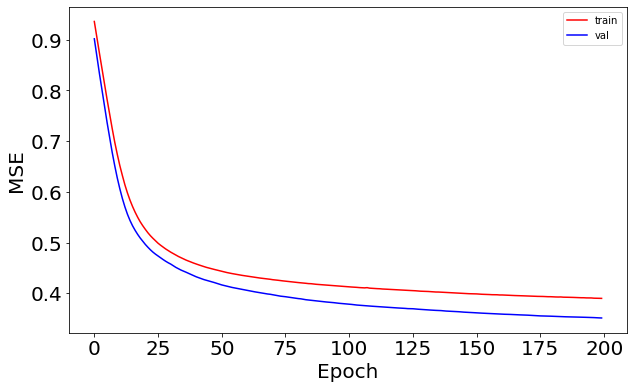

In [53]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Comparación de modelos

In [54]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF','Tree', ' SVR', 'NN'], 'MSE': [mse_lr, mse_ridge, mse_rf, mse_tree,mse_svr, mse_nn],
                    'MAE':[mae_lr, mae_ridge, mae_rf, mae_tree,mae_svr, mae_nn],
                    'R2':[r2_lr, r2_ridge, r2_rf, r2_tree,r2_svr, r2_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,MSE,MAE,R2
0,LR,0.163589,0.311901,0.836411
1,Ridge,0.163572,0.312042,0.836428
2,RF,0.085517,0.208829,0.914483
3,Tree,0.108104,0.223100,0.891896
4,SVR,0.118553,0.257272,0.881447
5,NN,0.116021,0.249513,0.883979


In [55]:
#crear nuevos datos
X_new  = pd.DataFrame([[27, 0, 30, 5999, 7000]], columns=['age', 'gender', 'miles', 'debt', 'income'])
X_new

,age,gender,miles,debt,income
0,27,0,30,5999,7000


In [56]:
# Make new predictions

ynew = new_model_RF.predict(X_new)



C:\Users\CHRISTA Y JAVIER\OneDrive\Documentos\Nueva carpeta\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [57]:
ynew

#Faltaría hacer ingeniería en reversa para revertir el escalemiento


array([1.89150135])